In [1]:
import tensorflow as tf
import datasets
import pickle
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties
from statistics import mean

sns.set_style("white")
sns.set_context("poster")


NUM_DATASETS = 29

BAND_DATASETS = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]
STRIPE_DATASETS = ['stripe2S', 'stripe4S', 'stripe6S', 'stripe8S', 'stripe10S', 'stripe2NS', 'stripe4NS', 'stripe6NS', 'stripe8NS', 'stripe10NS']
FLANK_DATASETS = ["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS"]
DIFF_DATASETS = ["diff1NS", "diff3NS", "diff5NS", "diff10NS"]
NATURAL_DATASETS = ["natS", "natNS"]
ALL_DATASETS = STRIPE_DATASETS + BAND_DATASETS + FLANK_DATASETS + DIFF_DATASETS

output_path = "/om/user/shobhita/data/symmetry/figures/"
data_path = '/om/user/shobhita/data/symmetry/'


        

        id: 0,
        name: DATA_CatNS0_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS0'],
        

        

        id: 1,
        name: DATA_CatNS2_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS2'],
        

        

        id: 2,
        name: DATA_CatNS4_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS4'],
        

        

        id: 3,
        name: DATA_CatNS6_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS6'],
        

        

        id: 4,
        name: DATA_CatNSd4_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NSd4'],
        

        

        id: 5,
        name: DATA_CatS0_D0,
        datas

In [2]:
def read_results(net, eid, name, for_datasets=None):
    results_data_generalization = {}
    acc_results = {}

    if net == 'dilation':
        import experiments.dilation as experiments
    elif net == 'lstm3':
        import experiments.LSTM3 as experiments

    output_path = data_path + net + '/'
    run_opt = experiments.get_experiments(output_path)[eid[0]:eid[1]]
    opt_data = datasets.get_datasets(output_path)

    for opt in run_opt:
        data_point = {}
        data_point["opt"] = opt

        if not os.path.isfile(opt.log_dir_base + opt.name + name):
            data_point["results"] = "empty"
            print(opt.log_dir_base + opt.name + name)
        else:
            with open(opt.log_dir_base + opt.name + name, 'rb') as f:
                data_point["results"] = pickle.load(f)     

        results_data_generalization[opt.ID] = copy.deepcopy(data_point)
        
        try:
            accs = data_point["results"]['acc']
        except:
            accs = data_point["results"]
        
        if accs == "empty" or not accs:
            continue
        
        if for_datasets is not None:
            accs = {ds: acc for ds, acc in accs.items() if ds in for_datasets}
        
        acc_results[opt.ID] = mean(accs.values())

    return results_data_generalization, acc_results

def get_max_acc(accs):
    max_exp = list(accs.keys())[0]
    max_acc = list(accs.values())[0]
    for exp, acc in accs.items():
        if acc >= max_acc:
            max_exp = exp
            max_acc = acc
    
    return max_exp, max_acc


In [3]:
def read_transformer_results(ds_name_mappings, natural_trained):
    results = pickle.load(open(data_path + "transformer_accuracy.pkl", "rb"))
    df = pd.DataFrame()
    training = "natural" if natural_trained else "synthetic"
    for ds_final_name, ds_original_names in ds_name_mappings.items():
        group_results = []
        for ds in ds_original_names:
            group_results.append(results[training][ds])
        df = df.append({"Accuracy": mean(group_results), "Dataset": ds_final_name, "Network": "Transformer"}, ignore_index=True)
    return df


def to_longform_df(network_to_eid, network_to_results, ds_groups):
    df = pd.DataFrame()
    for network, results in network_to_results.items():
        for ds_name, ds_ids in ds_groups.items():
            group_results = []
            for idx in ds_ids:
                try:
                    group_results.append(results[network_to_eid[network]]["results"][idx])    
                except:
                    group_results.append(results[network_to_eid[network]]["results"]["acc"][idx])    
            df = df.append({"Accuracy": mean(group_results), "Dataset": ds_name, "Network": network}, ignore_index=True)
    return df

def barplot(df, size, plotname, filename, legend_in=True):
    fig, ax = plt.subplots(figsize=size)
    sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=df, ax=ax)
    if not legend_in:
        plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    sns.despine()
    ax.set_title("{}".format(plotname))
    ax.set_ylim(0.5, 1)
    plt.savefig(output_path + "{}.pdf".format(filename))

# Dilated & LSTM3 Validation Accuracy

In [4]:
name = "/results/intra_dataset_accuracy.pkl"

net = "lstm3"
eid = (1, 91)
lstm_val_results, lstm_val_accs = read_results(net, eid, name)
lstm_max_val_exp, lstm_max_val_acc = get_max_acc(lstm_val_accs)

net = "dilation"
eid = (1, 55)
dilation_val_results, dilation_val_accs = read_results(net, eid, name)
dilation_max_val_exp, dilation_max_val_acc = get_max_acc(dilation_val_accs)

In [6]:
name = "/results/intra_dataset_accuracy.pkl"

net = "lstm3"
eid = (354, 385)
lstm_val_results, lstm_val_accs = read_results(net, eid, name)
lstm_max_val_exp_nat, lstm_max_val_acc_nat = get_max_acc(lstm_val_accs)

net = "dilation"
eid = (380, 397)
dilation_val_results, dilation_val_accs = read_results(net, eid, name)
dilation_max_val_exp_nat, dilation_max_val_acc_nat = get_max_acc(dilation_val_accs)

/om/user/shobhita/data/symmetry/lstm3/ID383_LSTM3_D116/results/intra_dataset_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID384_LSTM3_D116/results/intra_dataset_accuracy.pkl


In [7]:
LSTM_ID = lstm_max_val_exp
LSTM_ID_NATURAL = lstm_max_val_exp_nat
# DILATION_ID = dilation_max_val_exp
DILATION_ID = 54
DILATION_ID_NATURAL = dilation_max_val_exp_nat
network_to_eid = {"LSTM3": LSTM_ID, "Dilated": DILATION_ID}
network_to_eid_natural = {"LSTM3": LSTM_ID_NATURAL, "Dilated": DILATION_ID_NATURAL}

acc_dfs = []

# Dilated & LSTM Validation Accuracy (data efficiency)

### Synthetic -> synthetic data efficiency

In [8]:
# name = "/results/generalization_accuracy_generalization_test.pkl"
name = "/results/intra_dataset_accuracy.pkl"
lstm_size_to_eids = {1e2: (323, 353), 1e3: (1, 31), 1e4: (31, 61), 1e5: (61, 91)}
lstm_size_to_val_acc_synthetic = {}
lstm_size_to_best_eid_synthetic = {}

dilation_size_to_eids = {1e2: (399, 403), 1e3: (1, 19), 1e4: (19, 37), 1e5: (37, 55)}
dilation_size_to_val_acc_synthetic = {}
dilation_size_to_best_eid_synthetic = {}

net = "lstm3"
for size, eid in lstm_size_to_eids.items():
    lstm_val_results, lstm_val_accs = read_results(net, eid, name)
    lstm_max_val_exp, lstm_max_val_acc = get_max_acc(lstm_val_accs)
    lstm_size_to_val_acc_synthetic[size] = lstm_max_val_acc
    lstm_size_to_best_eid_synthetic[size] = (lstm_max_val_exp, lstm_max_val_exp + 1)

net = "dilation"
for size, eid in dilation_size_to_eids.items():
    dilation_val_results, dilation_val_accs = read_results(net, eid, name)
    dilation_max_val_exp, dilation_max_val_acc = get_max_acc(dilation_val_accs)
    dilation_max_val_exp = 54
    dilation_size_to_val_acc_synthetic[size] = dilation_max_val_acc
    dilation_size_to_best_eid_synthetic[size] = (dilation_max_val_exp, dilation_max_val_exp + 1)

/om/user/shobhita/data/symmetry/lstm3/ID337_LSTM3_D112/results/intra_dataset_accuracy.pkl


In [9]:
# name = "/results/generalization_accuracy_generalization_test.pkl"
name = "/results/intra_dataset_accuracy.pkl"
lstm_size_to_eids = {1e2: (385, 416), 1e3: (416, 446), 1e4: (446, 476)}
lstm_size_to_val_acc_natural = {}
lstm_size_to_best_eid_natural = {}

dilation_size_to_eids = {1e2: (403, 409), 1e3: (409, 415), 1e4: (415, 421)}
dilation_size_to_val_acc_natural = {}
dilation_size_to_best_eid_natural = {}

net = "lstm3"
for size, eid in lstm_size_to_eids.items():
    lstm_val_results, lstm_val_accs = read_results(net, eid, name)
    lstm_max_val_exp, lstm_max_val_acc = get_max_acc(lstm_val_accs)
    lstm_size_to_val_acc_natural[size] = lstm_max_val_acc
    lstm_size_to_best_eid_natural[size] = (lstm_max_val_exp, lstm_max_val_exp + 1)

net = "dilation"
for size, eid in dilation_size_to_eids.items():
    dilation_val_results, dilation_val_accs = read_results(net, eid, name)
    dilation_max_val_exp, dilation_max_val_acc = get_max_acc(dilation_val_accs)
    dilation_max_val_exp = 54
    dilation_size_to_val_acc_natural[size] = dilation_max_val_acc
    dilation_size_to_best_eid_natural[size] = (dilation_max_val_exp, dilation_max_val_exp + 1)

/om/user/shobhita/data/symmetry/lstm3/ID447_LSTM3_D118/results/intra_dataset_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID455_LSTM3_D118/results/intra_dataset_accuracy.pkl


In [10]:
transformer_results["synthetic_100.0"][0]

NameError: name 'transformer_results' is not defined

In [14]:
transformer_results["Dataset"] = "NA"
transformer_results
# df = pd.DataFrame()
for typex in ["synthetic", "natural"]:
    for size in [100.0, 10000.0, 100000.0]:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-14-83197a47d3d4>, line 6)

In [13]:
df

,Accuracy,Dataset,Training Data Size,Network
0,83.915735,20.0,100.0,LSTM3
1,80.670927,21.0,100.0,LSTM3
2,76.118211,22.0,100.0,LSTM3
3,78.863818,23.0,100.0,LSTM3
4,83.905751,24.0,100.0,LSTM3
...,...,...,...,...
235,100.000000,88.0,100000.0,Dilation
236,99.660543,89.0,100000.0,Dilation
237,99.420927,90.0,100000.0,Dilation
238,99.231230,91.0,100000.0,Dilation


# Data Efficiency Analysis

### Synthetic -> synthetic

In [12]:
ds = list(range(20, 30)) + list(range(45, 51)) + list(range(83, 93)) + list(range(114, 115))

net = "lstm3"
df_lstm = pd.DataFrame()
for size, eid in lstm_size_to_best_eid_synthetic.items():
    name = "/results/generalization_accuracy_generalization_test_4_8.pkl"
    lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=ds)
    lstm_best_exp, lstm_best_acc = get_max_acc(lstm_accs)
    accs = list(lstm_results.values())[0]["results"]
    for d in accs:
        df_lstm = df_lstm.append({"Dataset": d, "Training Data Size": str(size), "Accuracy": accs[d]}, ignore_index=True)
    
    df_lstm["Network"] = "LSTM3"

net = "dilation"
df_dilation = pd.DataFrame()
for size, eid in dilation_size_to_best_eid_synthetic.items():
    name = "/results/generalization_accuracy_generalization_test_4_8.pkl"
    dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=ds)
    dilation_best_exp, dilation_best_acc = get_max_acc(dilation_accs)
    accs = list(dilation_results.values())[0]["results"]
    for d in accs:
        df_dilation = df_dilation.append({"Dataset": d, "Training Data Size": str(size), "Accuracy": accs[d]}, ignore_index=True)        
    
df_dilation["Network"] = "Dilation"
df = pd.concat([df_lstm, df_dilation], ignore_index=True)

with open("/om/user/shobhita/src/symmetry/transformers/symmetry/symmetry/full_transformer_accs.pkl", "rb") as handle:
    transformer_results = pickle.load(handle)

for typex in ["synthetic"]:
    for size in [100.0, 1000.0, 10000.0]:
        for i in range(len(transformer_results.index)):
            df = df.append({"Accuracy": transformer_results["{}_{}".format(typex, size)][i]/100, "Dataset": i, "Training Data Size": str(size), "Network": "Transformer"}, ignore_index=True)

df["Accuracy"] = df["Accuracy"] * 100

#### full plot (wrong)

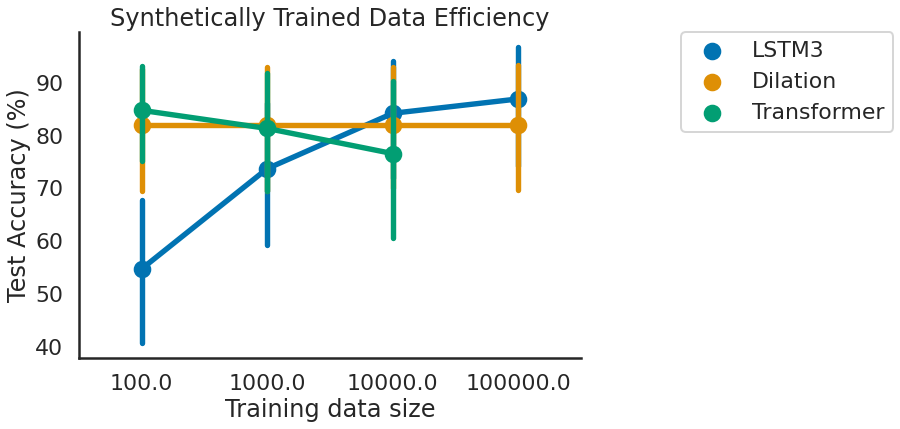

In [28]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.pointplot(x="Training Data Size", y="Accuracy", hue="Network", data=df, ci=95, plot_kws={"alpha": 0.3}, palette="colorblind")
sns.despine()
ax.set_title("Synthetically Trained Data Efficiency")
ax.set_xlabel("Training data size")
ax.set_ylabel("Test Accuracy (%)")
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.savefig(output_path + "acc_v_training_size.pdf")

#### LSTM plot (right)

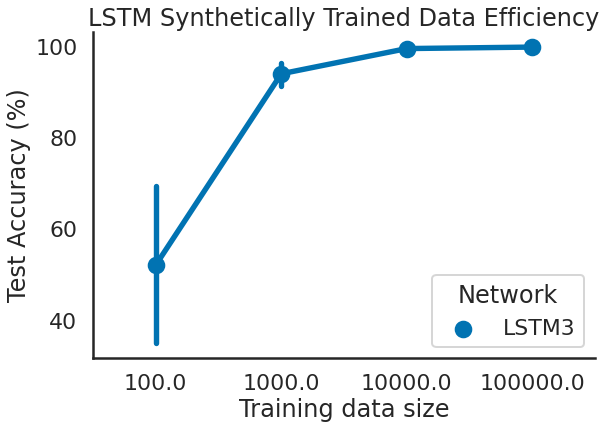

In [31]:
df = df[(df["Network"] == "LSTM3") & (df["Dataset"] < 45)]

fig, ax = plt.subplots(figsize=(9, 6))
sns.pointplot(x="Training Data Size", y="Accuracy", hue="Network", data=df, ci=95, plot_kws={"alpha": 0.3}, palette="colorblind")
sns.despine()
ax.set_title("LSTM Synthetically Trained Data Efficiency")
ax.set_xlabel("Training data size")
ax.set_ylabel("Test Accuracy (%)")
# plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.savefig(output_path + "acc_v_training_size.pdf")

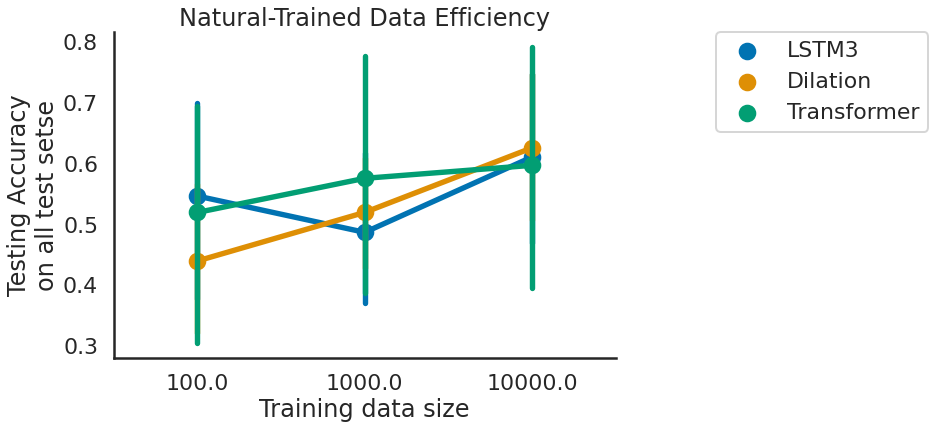

In [30]:
ds = list(range(20, 30)) + list(range(45, 51)) + list(range(83, 93)) + [114, 115]

net = "lstm3"
df_lstm = pd.DataFrame()
for size, eid in lstm_size_to_best_eid_natural.items():
    name = "/results/generalization_accuracy_generalization_test_4_8.pkl"
    lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=ds)
    lstm_best_exp, lstm_best_acc = get_max_acc(lstm_accs)
    accs = list(lstm_results.values())[0]["results"]
    for d in accs:
        df_lstm = df_lstm.append({"Dataset": d, "Training Data Size": str(size), "Accuracy": accs[d]}, ignore_index=True)

    df_lstm["Network"] = "LSTM3"

net = "dilation"
df_dilation = pd.DataFrame()
for size, eid in dilation_size_to_best_eid_natural.items():
    name = "/results/generalization_accuracy_generalization_test_4_8.pkl"
    dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=ds)
    dilation_best_exp, dilation_best_acc = get_max_acc(dilation_accs)

    accs = list(dilation_results.values())[0]["results"]
    for d in accs:
        df_dilation = df_dilation.append({"Dataset": d, "Training Data Size": str(size), "Accuracy": accs[d]}, ignore_index=True)


    df_dilation["Network"] = "Dilation"
df = pd.concat([df_lstm, df_dilation], ignore_index=True)

with open("/om/user/shobhita/src/symmetry/transformers/symmetry/symmetry/full_transformer_accs.pkl", "rb") as handle:
    transformer_results = pickle.load(handle)

for typex in ["natural"]:
    for size in [100.0, 1000.0, 10000.0]:
        for i in range(len(transformer_results.index)):
            df = df.append({"Accuracy": transformer_results["{}_{}".format(typex, size)][i]/100, "Dataset": i, "Training Data Size": str(size), "Network": "Transformer"}, ignore_index=True)



fig, ax = plt.subplots(figsize=(9, 6))
sns.pointplot(x="Training Data Size", y="Accuracy", hue="Network", data=df, palette="colorblind")
sns.despine()
ax.set_xlabel("Training data size")
ax.set_ylabel("Testing Accuracy\non all test setse")
ax.set_title("Natural-Trained Data Efficiency")
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.savefig(output_path + "acc_v_training_size.png")

# Band Datasets

## LSTM & Dilated accuracy (Synthetic trained)

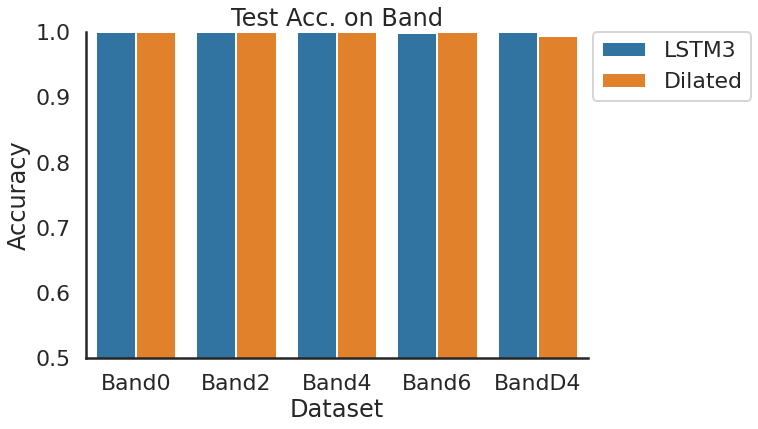

In [12]:
band_ds_groups = {"Band0": [20, 25], "Band2": [21, 26], "Band4": [22, 27], "Band6": [23, 28], "BandD4": [24, 29]}
name = '/results/generalization_accuracy.pkl'

net = "lstm3"
eid = (LSTM_ID, LSTM_ID + 1)
lstm_band_results, lstm_band_accs = read_results(net, eid, name, for_datasets=list(range(20, 30)))

net = "dilation"
eid = (DILATION_ID, DILATION_ID + 1)
dilation_band_results, dilation_band_accs = read_results(net, eid, name)

band_network_to_results = {"LSTM3": lstm_band_results, "Dilated": dilation_band_results}
band_df = to_longform_df(network_to_eid, band_network_to_results, band_ds_groups)
band_df["Trained on"] = "Synthetic"
acc_dfs.append(band_df)

barplot(band_df, (9,6), "Test Acc. on Band", "band_accs.pdf", legend_in=False)

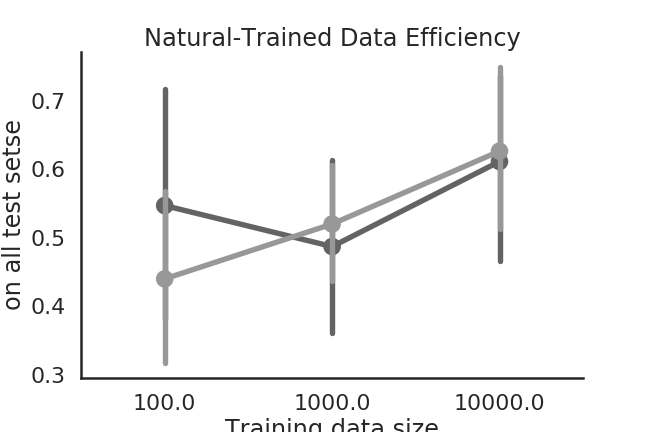

In [15]:
from PIL import Image, ImageOps
im = Image.open(output_path + "acc_v_training_size.png")
ImageOps.grayscale(im)

## LSTM & Dilated accuracy (Natural trained)

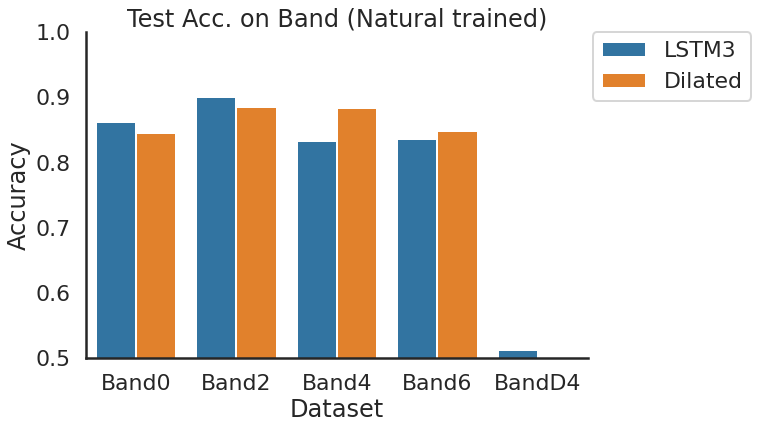

In [21]:
band_ds_groups = {"Band0": [20, 25], "Band2": [21, 26], "Band4": [22, 27], "Band6": [23, 28], "BandD4": [24, 29]}
name = '/results/generalization_accuracy_synthetic.pkl'

net = "lstm3"
eid = (LSTM_ID_NATURAL, LSTM_ID_NATURAL + 1)
lstm_band_results, lstm_band_accs = read_results(net, eid, name, for_datasets=list(range(20, 30)))

net = "dilation"
eid = (DILATION_ID_NATURAL, DILATION_ID_NATURAL + 1)
dilation_band_results, dilation_band_accs = read_results(net, eid, name)

band_network_to_results = {"LSTM3": lstm_band_results, "Dilated": dilation_band_results}
band_df = to_longform_df(network_to_eid_natural, band_network_to_results, band_ds_groups)
band_df["Trained on"] = "Natural"
acc_dfs.append(band_df)

barplot(band_df, (9,6), "Test Acc. on Band (Natural trained)", "band_accs_natural.pdf", legend_in=False)

## Transformers (synthetic trained)

In [9]:
ds_groups = {"Band0": ["synthetic"], "Band2": ["NS2", "S2"], "Band4": ["synthetic"], "Band6": ["NS6", "S6"], "BandD4": ["Sd4", "NSd4"]}

transformer_results = read_transformer_results(ds_groups, natural_trained=False)
transformer_results["Trained on"] = "Synthetic"
acc_dfs.append(transformer_results)

## Transformers (natural trained)

In [10]:
ds_groups = {"Band0": ["synthetic"], "Band2": ["NS2", "S2"], "Band4": ["synthetic"], "Band6": ["NS6", "S6"], "BandD4": ["Sd4", "NSd4"]}

transformer_results = read_transformer_results(ds_groups, natural_trained=True)
transformer_results["Trained on"] = "Natural"
acc_dfs.append(transformer_results)

## RCNN-SAT (synthetic trained)

In [11]:
full_results = {}
dataset_full_results = {}
for size in [25, 50, 100, 150, 1000, 10000]:
    name = "rcnn_synthetic_to_synthetic_size_{}.pkl".format(size)
    with open(data_path + "rcnn_sat/" + name, "rb") as handle:
        rcnn_results = pickle.load(handle)

    training = [("NS0", 0), ("NS4", 0), ("S0", 1), ("S4", 1)]
    testing = [("NS2", 0), ("S2", 1), ("NS6", 0), ("S6", 1), ("NSd4", 0), ("Sd4", 1)]
    overall = training + testing

    groups = {"Overall": overall, "Training": training, "Testing": testing}
    results = {}
    dataset_results = {}
    for groupname, datasets in groups.items():
        probs = []
        labels = []
        for d, label in datasets:
            d_probs = rcnn_results[d]['probs']
            d_labels = np.asarray([label]*len(rcnn_results[d]['probs']))
            d_preds = np.argmax(d_probs, axis=1)
            d_acc = np.sum(d_preds == d_labels) / len(d_preds)
            dataset_results[d] = d_acc
            probs.append(d_probs)
            labels.append(d_labels)
        probs = np.concatenate(probs)
        labels = np.concatenate(labels)
        preds = np.argmax(probs, axis=1)
        acc = np.sum(preds == labels) / len(preds)
        results[groupname] = acc
    full_results[size] = results
    dataset_full_results[size] = dataset_results

In [12]:
dataset_full_results

{25: {'NS0': 0.943,
  'NS4': 0.5809,
  'S0': 0.4153,
  'S4': 0.4673,
  'NS2': 0.8162,
  'S2': 0.2245,
  'NS6': 0.8273,
  'S6': 0.2494,
  'NSd4': 0.9995,
  'Sd4': 0.0058},
 50: {'NS0': 0.8587,
  'NS4': 0.793,
  'S0': 0.8784,
  'S4': 0.3254,
  'NS2': 0.9102,
  'S2': 0.2885,
  'NS6': 0.3215,
  'S6': 0.6843,
  'NSd4': 0.9311,
  'Sd4': 0.1568},
 100: {'NS0': 0.9582,
  'NS4': 0.6509,
  'S0': 0.7384,
  'S4': 0.5704,
  'NS2': 0.9025,
  'S2': 0.3972,
  'NS6': 0.2774,
  'S6': 0.7714,
  'NSd4': 0.8642,
  'Sd4': 0.3156},
 150: {'NS0': 0.9176,
  'NS4': 0.7709,
  'S0': 0.8369,
  'S4': 0.4669,
  'NS2': 0.9261,
  'S2': 0.4062,
  'NS6': 0.5815,
  'S6': 0.5628,
  'NSd4': 0.6448,
  'Sd4': 0.5853},
 1000: {'NS0': 0.943,
  'NS4': 0.7264,
  'S0': 0.9004,
  'S4': 0.6848,
  'NS2': 0.8576,
  'S2': 0.6424,
  'NS6': 0.2667,
  'S6': 0.8671,
  'NSd4': 0.7517,
  'Sd4': 0.6333},
 10000: {'NS0': 0.9433,
  'NS4': 0.7467,
  'S0': 0.9017,
  'S4': 0.6825,
  'NS2': 0.8768,
  'S2': 0.6391,
  'NS6': 0.3084,
  'S6': 0.8501,


In [6]:
full_results

{25: {'Overall': 0.55292, 'Training': 0.601625, 'Testing': 0.52045},
 50: {'Overall': 0.61479, 'Training': 0.713875, 'Testing': 0.5487333333333333},
 100: {'Overall': 0.64462, 'Training': 0.729475, 'Testing': 0.58805},
 150: {'Overall': 0.6699, 'Training': 0.748075, 'Testing': 0.6177833333333334},
 1000: {'Overall': 0.72734, 'Training': 0.81365, 'Testing': 0.6698}}

## Accuracy by training dataset size

/om/user/shobhita/data/symmetry/lstm3/ID332_LSTM3_D112/results/generalization_accuracy_full_test2.pkl
/om/user/shobhita/data/symmetry/lstm3/ID333_LSTM3_D112/results/generalization_accuracy_full_test2.pkl
/om/user/shobhita/data/symmetry/lstm3/ID337_LSTM3_D112/results/generalization_accuracy_full_test2.pkl


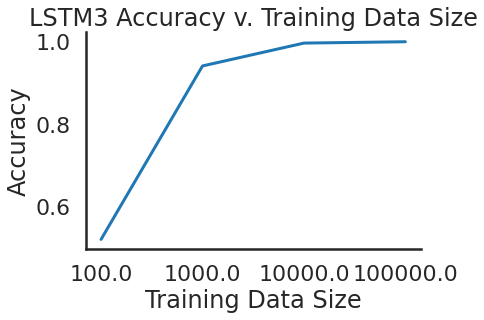

In [7]:
net = "lstm3"
ds = list(range(20, 30))

size_to_eids = {1e2: (323, 353), 1e3: (1, 31), 1e4: (31, 61), 1e5: (61, 91)}
df = pd.DataFrame()

for size, eid in size_to_eids.items():
    name = '/results/generalization_accuracy.pkl' if size > 1e2 else '/results/generalization_accuracy_full_test2.pkl'
    lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(range(20, 30)))
    lstm_best_exp, lstm_best_acc = get_max_acc(lstm_accs)

    df = df.append({"Training Data Size": str(size), "Accuracy": lstm_best_acc}, ignore_index=True)


fig, ax = plt.subplots()
sns.lineplot(x="Training Data Size", y="Accuracy", data=df)
sns.despine()
ax.set_title("LSTM3 Accuracy v. Training Data Size")
plt.savefig(output_path + "lstm3_acc_v_training_size.pdf")




# Flank Datasets

## LSTM & Dilated accuracy (Synthetic trained)

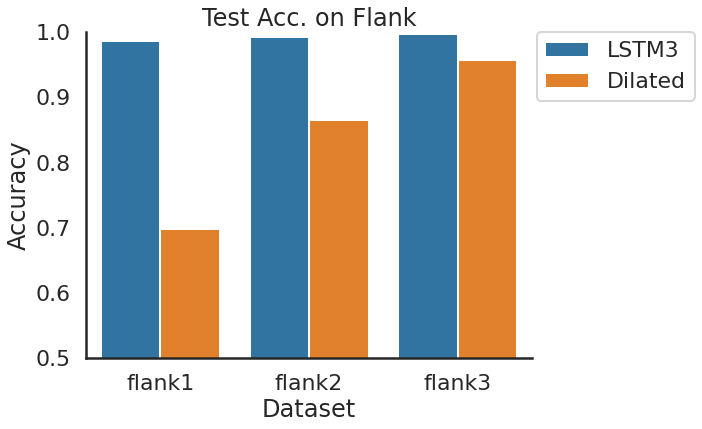

In [14]:
ds_ids = range(45, 51)
ds_groups = {"flank1": [45, 46], "flank2": [47, 48], "flank3": [49, 50]}

net = "lstm3"
name = '/results/generalization_accuracy.pkl'
eid = (LSTM_ID, LSTM_ID + 1)
lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

net = "dilation"
name = '/results/generalization_accuracy2.pkl'
eid = (DILATION_ID, DILATION_ID + 1)
dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

network_to_results = {"LSTM3": lstm_results, "Dilated": dilation_results}
df = to_longform_df(network_to_eid, network_to_results, ds_groups)
df["Trained on"] = "Synthetic"
acc_dfs.append(df)

# def barplot(df, size, plotname, filename, legend_in=True):
#     fig, ax = plt.subplots(figsize=size)
#     sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=df, ax=ax)
#     if not legend_in:
#         plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#     sns.despine()
#     ax.set_title("")
#     ax.set_xlabel("")
#     ax.set_ylim(0.5, 1)
#     plt.savefig(output_path + "{}.pdf".format(filename))

barplot(df, (8,6), "Test Acc. on Flank", "flank_accs.pdf", legend_in=False)

## LSTM & Dilated accuracy (Natural trained)

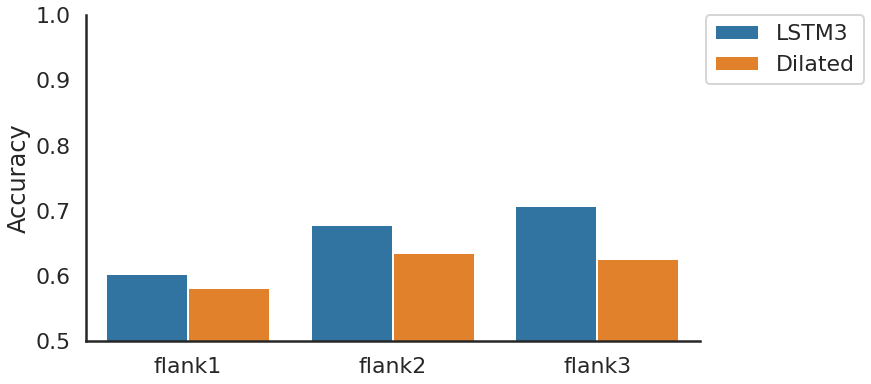

In [49]:
ds_ids = range(45, 51)
ds_groups = {"flank1": [45, 46], "flank2": [47, 48], "flank3": [49, 50]}

net = "lstm3"
name = '/results/generalization_accuracy_synthetic.pkl'
eid = (LSTM_ID_NATURAL, LSTM_ID_NATURAL + 1)
lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

net = "dilation"
name = '/results/generalization_accuracy_synthetic.pkl'
eid = (DILATION_ID_NATURAL, DILATION_ID_NATURAL + 1)
dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

network_to_results = {"LSTM3": lstm_results, "Dilated": dilation_results}
df = to_longform_df(network_to_eid_natural, network_to_results, ds_groups)
df["Trained on"] = "Natural"
acc_dfs.append(df)


barplot(df, (11,6), "Flank Datasets (Naturally trained)", "flank_accs_natural.pdf", legend_in=False)

## Transformers (synthetic trained)

In [14]:
ds_groups = {"flank1": ["flank1S", "flank1NS"], "flank2": ["flank2S", "flank2NS"], "flank3": ["flank3S", "flank3NS"]}

transformer_results = read_transformer_results(ds_groups, natural_trained=False)
transformer_results["Trained on"] = "Synthetic"
acc_dfs.append(transformer_results)

## Transformers (natural trained)

In [15]:
ds_groups = {"flank1": ["flank1S", "flank1NS"], "flank2": ["flank2S", "flank2NS"], "flank3": ["flank3S", "flank3NS"]}

transformer_results = read_transformer_results(ds_groups, natural_trained=True)
transformer_results["Trained on"] = "Natural"
acc_dfs.append(transformer_results)

# Stripe Datasets

## LSTM & Dilated accuracy  (Synthetic trained)

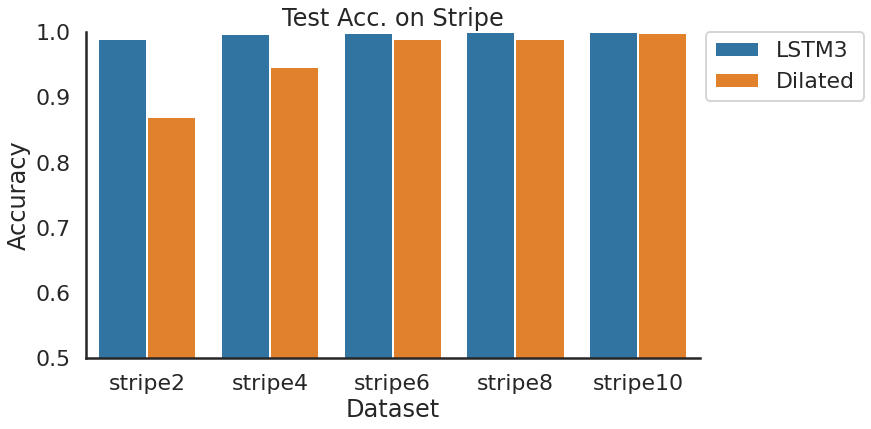

In [15]:
ds_ids = range(83, 93)
ds_groups = {"stripe2": [83, 88], "stripe4": [84, 89], "stripe6": [85, 90], "stripe8": [86, 91], "stripe10": [87, 92]}

net = "lstm3"
name = '/results/generalization_accuracy_stripe.pkl'
eid = (LSTM_ID, LSTM_ID + 1)
lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

net = "dilation"
name = '/results/generalization_accuracy_stripe.pkl'
eid = (DILATION_ID, DILATION_ID + 1)
dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

network_to_results = {"LSTM3": lstm_results, "Dilated": dilation_results}
df = to_longform_df(network_to_eid, network_to_results, ds_groups)
df["Trained on"] = "Synthetic"
acc_dfs.append(df)

barplot(df, (11,6), "Test Acc. on Stripe", "stripe_accs.pdf", legend_in=False)

## LSTM & Dilated accuracy (Natural trained)

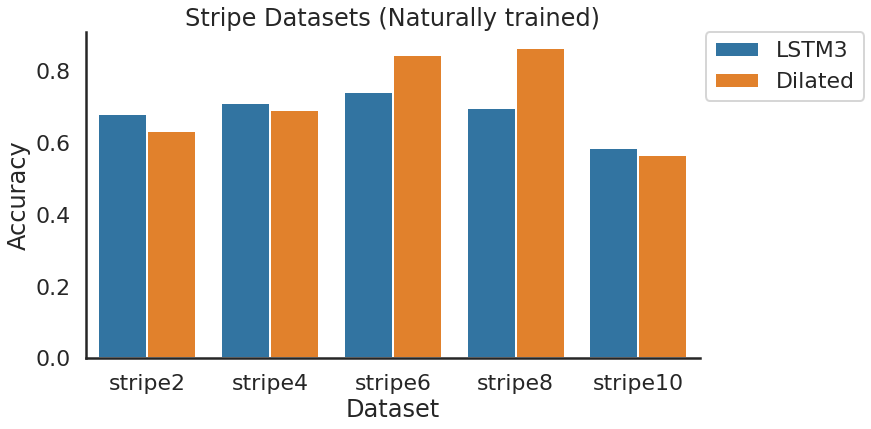

In [17]:
ds_ids = range(83, 93)
ds_groups = {"stripe2": [83, 88], "stripe4": [84, 89], "stripe6": [85, 90], "stripe8": [86, 91], "stripe10": [87, 92]}

net = "lstm3"
name = '/results/generalization_accuracy_synthetic.pkl'
eid = (LSTM_ID_NATURAL, LSTM_ID_NATURAL + 1)
lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))
net = "dilation"
name = '/results/generalization_accuracy_synthetic.pkl'
eid = (DILATION_ID_NATURAL, DILATION_ID_NATURAL + 1)
dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

network_to_results = {"LSTM3": lstm_results, "Dilated": dilation_results}
df = to_longform_df(network_to_eid_natural, network_to_results, ds_groups)
df["Trained on"] = "Natural"
acc_dfs.append(df)

barplot(df, (11,6), "Stripe Datasets (Naturally trained)", "stripe_accs_natural.pdf", legend_in=False)

## Transformers (synthetic trained)

In [18]:
ds_groups = {"stripe2": ["stripe2S", "stripe2NS"], "stripe4": ["stripe4S", "stripe4NS"], "stripe6": ["stripe6S", "stripe6NS"], "stripe8": ["stripe8S", "stripe8NS"], "stripe10": ["stripe10S", "stripe10NS"]}

transformer_results = read_transformer_results(ds_groups, natural_trained=False)
transformer_results["Trained on"] = "Synthetic"
acc_dfs.append(transformer_results)

## Transformers (natural trained)

In [19]:
ds_groups = {"stripe2": ["stripe2S", "stripe2NS"], "stripe4": ["stripe4S", "stripe4NS"], "stripe6": ["stripe6S", "stripe6NS"], "stripe8": ["stripe8S", "stripe8NS"], "stripe10": ["stripe10S", "stripe10NS"]}

transformer_results = read_transformer_results(ds_groups, natural_trained=True)
transformer_results["Trained on"] = "Natural"
acc_dfs.append(transformer_results)

## LSTM accuracy by timesteps

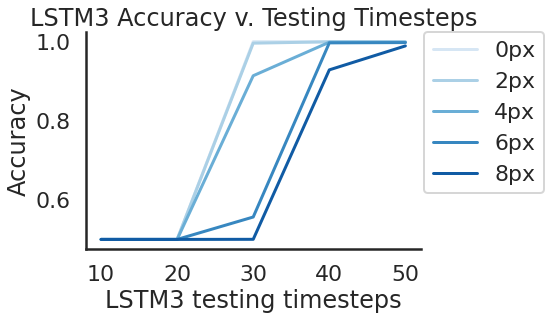

In [18]:
ds_ids = range(83, 93)
ds_groups = {2: [83, 88], 4: [84, 89], 6: [85, 90], 8: [86, 91], 10: [87, 92]}

dfs = []

net = "lstm3"
eid = (LSTM_ID, LSTM_ID + 1)

for nsteps in [10, 20, 30, 40, 50]:
    name = "/results/generalization_accuracy_stripe_{}iter.pkl".format(nsteps)
    lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))
    network_to_results = {"LSTM3": lstm_results}
    df = to_longform_df(network_to_eid, network_to_results, ds_groups)
    df["LSTM3 testing timesteps"] = nsteps
    df["from center"] = df["Dataset"].apply(lambda x: str(int(10-x)) + "px")
    dfs.append(df)
    
df_total = pd.concat(dfs)
df_total = df_total.sort_values(by="Dataset", ascending=False)

fig, ax = plt.subplots()
sns.lineplot(x="LSTM3 testing timesteps", y="Accuracy", hue="from center", data=df_total, palette="Blues")
sns.despine()
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., ncol=1)
ax.set_title("LSTM3 Accuracy v. Testing Timesteps")
plt.savefig(output_path + "lstm3_stripe_acc_v_timsteps.pdf", bbox_inches="tight")


# Perturbed datasets

## Perturbed datasets  (Synthetic trained)

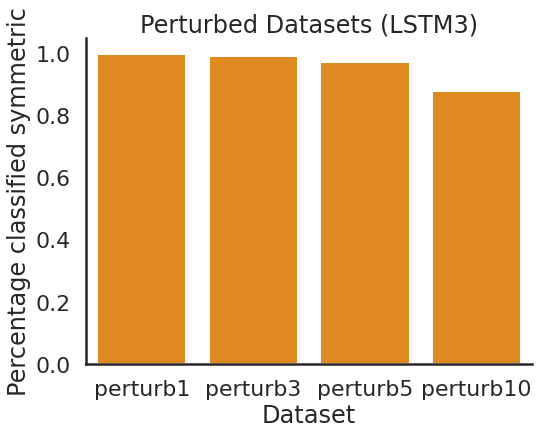

In [21]:
ds_ids = range(59, 64)
ds_groups = {"perturb1": [59], "perturb3": [60], "perturb5": [61], "perturb10": [62]}

net = "lstm3"
name = '/results/generalization_accuracy_full_test'
eid = (LSTM_ID, LSTM_ID + 1)
lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

network_to_results = {"LSTM3": lstm_results}
df = to_longform_df(network_to_eid, network_to_results, ds_groups)
df["Percentage classified symmetric"] = 1 - df["Accuracy"]
df["Trained on"] = "Natural"
acc_dfs.append(df)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Dataset", y="Percentage classified symmetric", color="darkorange", data=df, ax=ax)
sns.despine()
ax.set_title("Perturbed Datasets (LSTM3)")
plt.savefig(output_path + "perturbed_acc.pdf")

## Perturbed datasets (Natural trained)

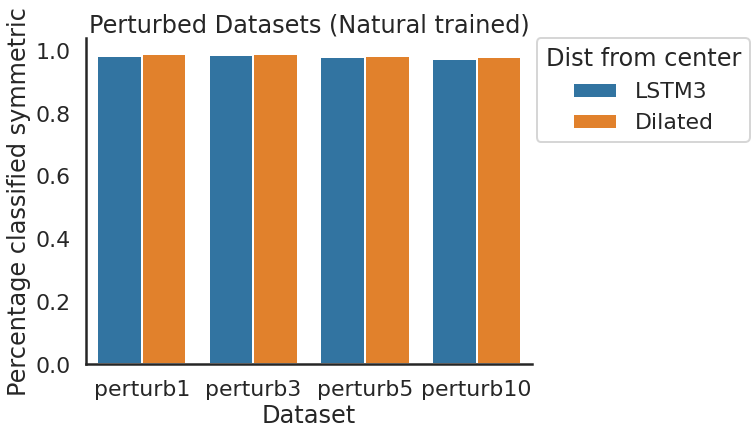

In [22]:
ds_ids = range(59, 64)
ds_groups = {"perturb1": [59], "perturb3": [60], "perturb5": [61], "perturb10": [62]}

net = "lstm3"
name = '/results/generalization_accuracy_synthetic.pkl'
eid = (LSTM_ID_NATURAL, LSTM_ID_NATURAL + 1)

lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))
net = "dilation"
name = '/results/generalization_accuracy_synthetic.pkl'
eid = (DILATION_ID_NATURAL, DILATION_ID_NATURAL + 1)
dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

network_to_results = {"LSTM3": lstm_results, "Dilated": dilation_results}
df = to_longform_df(network_to_eid_natural, network_to_results, ds_groups)
df["Percentage classified symmetric"] = 1 - df["Accuracy"]
df["Trained on"] = "Natural"
acc_dfs.append(df)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Dataset", y="Percentage classified symmetric", hue="Network", data=df, ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title="Dist from center")
sns.despine()
ax.set_title("Perturbed Datasets (Natural trained)")
plt.savefig(output_path + "perturbed_acc_natural.pdf")

# Natural image datasets

## Dilated & LSTM3 accuracy (synthetic trained)

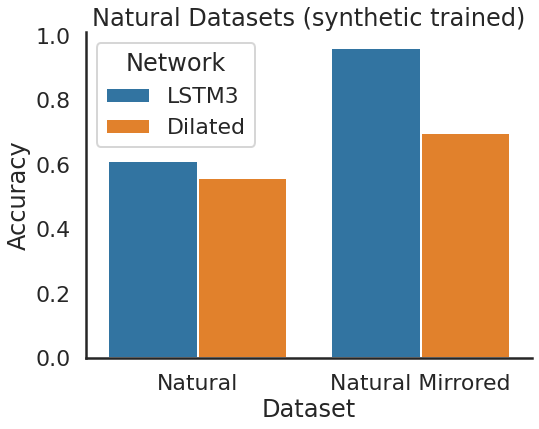

In [23]:
ds_ids = range(114, 116)
ds_groups = {"Natural": [114], "Natural Mirrored": [115]}
nat_dfs = []

net = "lstm3"
name = '/results/generalization_accuracy_naturaltests.pkl'
eid = (LSTM_ID, LSTM_ID + 1)
lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

net = "dilation"
name = '/results/generalization_accuracy_naturaltests.pkl'
eid = (DILATION_ID, DILATION_ID + 1)
dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

network_to_results = {"LSTM3": lstm_results, "Dilated": dilation_results}
df = to_longform_df(network_to_eid, network_to_results, ds_groups)
df["Trained on"] = "Synthetic"
acc_dfs.append(df)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=df, ax=ax)
sns.despine()
ax.set_title("Natural Datasets (synthetic trained)")
plt.savefig(output_path + "synthetic_to_natural_accs.pdf")

## Further analysis (violinplots)

## Dilated & LSTM3 Accuracy (natural trained)

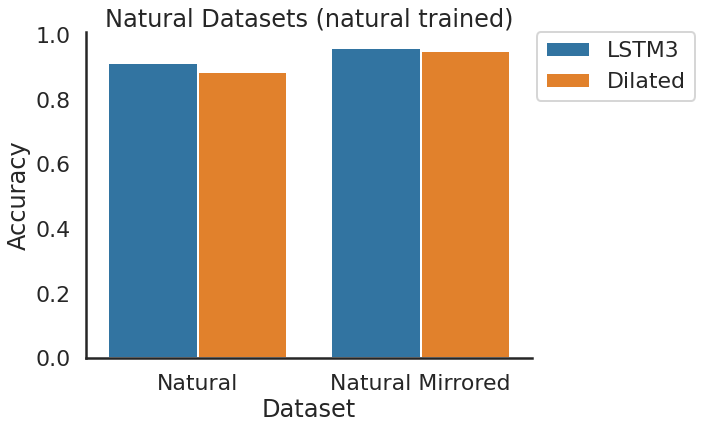

In [24]:
ds_ids = range(114, 116)
ds_groups = {"Natural": [114], "Natural Mirrored": [115]}
nat_dfs = []

net = "lstm3"
name = '/results/generalization_accuracy_naturaltests.pkl'
eid = (LSTM_ID_NATURAL, LSTM_ID_NATURAL + 1)
lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

net = "dilation"
name = '/results/generalization_accuracy_naturaltests.pkl'
eid = (DILATION_ID_NATURAL, DILATION_ID_NATURAL + 1)
dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

network_to_results = {"LSTM3": lstm_results, "Dilated": dilation_results}
df = to_longform_df(network_to_eid_natural, network_to_results, ds_groups)
df["Trained on"] = "Natural"
acc_dfs.append(df)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=df, ax=ax)
sns.despine()
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
ax.set_title("Natural Datasets (natural trained)")
plt.savefig(output_path + "natural_to_natural_accs.pdf")

In [10]:
name = "/results/generalization_accuracy_natural_ims2.pkl"

ds_ids = range(114, 115)
ds_groups = {"Natural": [114]}
nat_dfs = []

net = "lstm3"
eid = (LSTM_ID_NATURAL, LSTM_ID_NATURAL + 1)
lstm_results, lstm_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

lstm_results

# net = "dilation"
# name = '/results/generalization_accuracy_naturaltests.pkl'
# eid = (DILATION_ID_NATURAL, DILATION_ID_NATURAL + 1)
# dilation_results, dilation_accs = read_results(net, eid, name, for_datasets=list(ds_ids))

# network_to_results = {"LSTM3": lstm_results, "Dilated": dilation_results}
# df = to_longform_df(network_to_eid_natural, network_to_results, ds_groups)
# df["Trained on"] = "Natural"
# acc_dfs.append(df)

# fig, ax = plt.subplots(figsize=(8, 6))
# sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=df, ax=ax)
# sns.despine()
# plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# ax.set_title("Natural Datasets (natural trained)")
# plt.savefig(output_path + "natural_to_natural_accs.pdf")

/om/user/shobhita/data/symmetry/lstm3/ID373_LSTM3_D113/results/generalization_accuracy_natural_ims2.pkl


{373: {'opt': <experiments.LSTM3.Experiments at 0x2ab68146a0b8>,
  'results': 'empty'}}

## Transformers (synthetic trained)

In [25]:
ds_groups = {"Natural": ["natural"]}

transformer_results = read_transformer_results(ds_groups, natural_trained=False)
transformer_results["Trained on"] = "Synthetic"
acc_dfs.append(transformer_results)

## Transformers (natural trained)

In [26]:
ds_groups = {"Natural": ["natural"]}

transformer_results = read_transformer_results(ds_groups, natural_trained=True)
transformer_results["Trained on"] = "Natural"
acc_dfs.append(transformer_results)

In [27]:
full_acc_df = pd.concat(acc_dfs, ignore_index=True)

In [109]:
full_acc_df.to_csv(output_path + "accuracy_dataframe.csv", index=False)

In [29]:
df = pickle.load(open("/om/user/shobhita/data/symmetry/figures/accuracy_dataframe.csv"))

,Accuracy,Dataset,Network,Trained on,Percentage classified symmetric
20,100.000000,Band0,Transformer,Synthetic,NaN
21,100.000000,Band2,Transformer,Synthetic,NaN
22,100.000000,Band4,Transformer,Synthetic,NaN
23,99.100000,Band6,Transformer,Synthetic,NaN
24,100.000000,BandD4,Transformer,Synthetic,NaN
25,98.900000,Band0,Transformer,Natural,NaN
26,99.700000,Band2,Transformer,Natural,NaN
27,98.900000,Band4,Transformer,Natural,NaN
28,87.400000,Band6,Transformer,Natural,NaN
29,60.100000,BandD4,Transformer,Natural,NaN


In [ ]:
# LSTM3 Stripe results - 50 iter
import experiments.LSTM3 as experiments
from statistics import mean

cats = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]
test_cats = ["stripe2S", "stripe4S", "stripe6S", "stripe8S", "stripe10S", "stripe2NS", "stripe4NS", "stripe6NS", "stripe8NS", "stripe10NS"]
name = '/results/generalization_accuracy_stripe_50iter.pkl'
net = "lstm3"
experiment_id = 90

def get_stripe_results(filename, experiment_id, net):
    output_path = '/om/user/shobhita/data/symmetry/' + net + '/'
    run_opt = experiments.get_experiments(output_path)
    opt_data = datasets.get_datasets(output_path)
    opt = run_opt[experiment_id]

    data_point = {}
    data_point["opt"] = opt
    stripe_datasets = {ds.ID: ds.type[0] for ds in opt_data if ds.type[0] in STRIPE_DATASETS}

    if not os.path.isfile(opt.log_dir_base + opt.name + filename):
        data_point["results"] = "empty"
        print(opt.log_dir_base + opt.name + filename)
    else:
        with open(opt.log_dir_base + opt.name + filename, 'rb') as f:
            data_point["results"] = pickle.load(f)
            print(opt.log_dir_base + opt.name + filename)



    results = {name: [] for name in STRIPE_DATASETS}
    for idx, acc in data_point['results'].items():
        results[stripe_datasets[idx]].append(acc)
    return results

full_results = pd.DataFrame()
for iters in [10,20,30,40,50]:
    name = "/results/generalization_accuracy_stripe_{}iter.pkl".format(iters)
    results = get_stripe_results(name, experiment_id, net)
    iter_results = {name: mean(accs) for name, accs in results.items() if "N" not in name}
    full_results = full_results.append(pd.Series(iter_results), ignore_index=True)
full_results.index = [10,20,30,40,50]
full_results.columns = ["0px", "8px", "6px", "4px", "2px"]
full_results = full_results[["0px", "2px", "4px", "6px", "8px"]]

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.lineplot(data=full_results, dashes=False, ax=ax)
ax.set_xticks([10,20,30,40,50])
ax.legend(title="Dist from center", prop={"size":12})
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_xlabel("Iterations", size=12)
ax.set_ylabel("Accuracy", size=12)

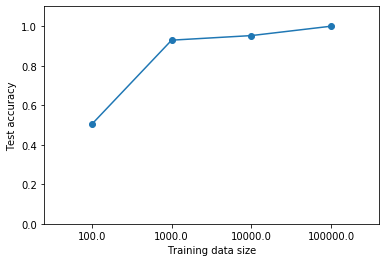

In [5]:
def get_accs(res, ids):
    train_sets = [20, 22, 25, 27]
    accs = []
    for ds in res[0]["results"]:
        if ds in ids:
            accs.append(res[0]["results"][ds])
    return accs, mean(accs)

size_means = []
sizes = [1e2, 1e3, 1e4, 1e5]
train_sets = [20, 22, 25, 27]
test_sets = [21, 23, 24, 26, 28, 29]
for i, b in enumerate([best3, best0, best1, best2]):
    trains, train_mean = get_accs(b, train_sets)
    tests, test_mean = get_accs(b, test_sets)
    size_means.append(test_mean)

df = pd.DataFrame()
df["size"] = [1, 2, 3, 4]
df["means"] = size_means 

fig, ax = plt.subplots()
ax.plot(df["size"],df["means"],  marker="o")
ax.set_ylim(0, 1.1)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(sizes)
ax.set_xlabel("Training data size")
ax.set_ylabel("Test accuracy")
ax.margins(0.2)

In [6]:
best3

[{'opt': <experiments.LSTM3.Experiments at 0x2aafceb0f2b0>,
  'results': {20: 0.47424121405750796,
   21: 0.45636980830670926,
   22: 0.4731429712460064,
   23: 0.4768370607028754,
   24: 0.3402555910543131,
   25: 0.5630990415335463,
   26: 0.5375399361022364,
   27: 0.5210662939297125,
   28: 0.5394369009584664,
   29: 0.6742212460063898,
   45: 0.5399361022364217,
   46: 0.4841253993610224,
   47: 0.40045926517571884,
   48: 0.6041333865814696,
   49: 0.2861421725239617,
   50: 0.7401158146964856,
   51: 0.4407947284345048,
   52: 0.44548722044728434,
   53: 0.43210862619808305,
   54: 0.4406948881789137,
   55: 0.4423921725239617,
   56: 0.4520766773162939,
   57: 0.4463857827476038,
   58: 0.4512779552715655,
   59: 0.4366014376996805,
   60: 0.4399960063897764,
   61: 0.4406948881789137,
   62: 0.45117811501597443,
   82: 0.3527356230031949,
   83: 0.31839057507987223,
   84: 0.33226837060702874,
   85: 0.9359025559105432,
   86: 0.6904952076677316,
   87: 0.7275359424920128,
   

In [16]:
# GET NEW LSTM3 RESULTS
def get_new_results(min_id, max_id, acc_thresh, name):
    results_data_generalization = []

    output_path = '/om/user/shobhita/data/symmetry/' + net + '/'
    run_opt = experiments.get_experiments(output_path)[min_id:max_id]
    opt_data = datasets.get_datasets(output_path)

    results_data_generalization.append([])
    for opt in run_opt[1:]:
        data_point = {}

        data_point["opt"] = opt

        if not os.path.isfile(opt.log_dir_base + opt.name + name):
            data_point["results"] = "empty"
            print("ERROR", opt.log_dir_base + opt.name + name)
        else:
            with open(opt.log_dir_base + opt.name + name, 'rb') as f:
                data_point["results"] = pickle.load(f)

        results_data_generalization[-1].append(copy.deepcopy(data_point))

    dataset_train_idx = [30, 31, 32]

    best_results = None
    best_mean = 0
    thresh_results = []
    for res in results_data_generalization[-1]:
        if res["results"] == "empty":
            continue
        add = True
        mean_acc = np.asarray(list(res['results'].values())).mean()
#             if mean_acc >= best_mean or res['opt'].name == "ID54_Dilation_D32":
        if mean_acc >= acc_thresh:
            thresh_results.append(res)
#         if mean_acc >= best_mean:
            best_results = [res]
            best_mean = mean_acc
    return best_results, results_data_generalization, thresh_results




In [10]:
net = "lstm3"
name = '/results/generalization_accuracy_full_test2.pkl'
import experiments.LSTM3 as experiments

# 215-322
best1, all_res1, thresh1 = get_new_results(215, 322, 0.6, name)

323
ERROR /om/user/shobhita/data/symmetry/lstm3/ID223_LSTM3_D30/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symmetry/lstm3/ID268_LSTM3_D31/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symmetry/lstm3/ID269_LSTM3_D31/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symmetry/lstm3/ID270_LSTM3_D31/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symmetry/lstm3/ID271_LSTM3_D31/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symmetry/lstm3/ID272_LSTM3_D31/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symmetry/lstm3/ID273_LSTM3_D31/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symmetry/lstm3/ID274_LSTM3_D31/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symmetry/lstm3/ID275_LSTM3_D31/results/generalization_accuracy_full_test2.pkl
ERROR /om/user/shobhita/data/symm

In [11]:
best1

[{'opt': <experiments.LSTM3.Experiments at 0x2b41a4e355f8>,
  'results': {20: 0.9999001597444089,
   21: 1.0,
   22: 0.9999001597444089,
   23: 0.9994009584664537,
   24: 0.9999001597444089,
   25: 1.0,
   26: 1.0,
   27: 1.0,
   28: 1.0,
   29: 1.0,
   45: 9.984025559105431e-05,
   46: 1.0,
   47: 0.5633985623003195,
   48: 1.0,
   49: 0.9551717252396166,
   50: 0.9999001597444089,
   51: 0.0,
   52: 0.0,
   53: 0.0,
   54: 0.00019968051118210862,
   55: 0.0,
   56: 0.0,
   57: 0.0,
   58: 0.0002995207667731629,
   59: 0.0,
   60: 0.0,
   61: 0.0,
   62: 0.0002995207667731629,
   82: 0.9999001597444089,
   83: 0.520167731629393,
   84: 0.9734424920127795,
   85: 1.0,
   86: 0.9996006389776357,
   87: 0.9807308306709265,
   88: 0.9999001597444089,
   89: 0.9999001597444089,
   90: 0.9985023961661342,
   91: 1.0,
   92: 1.0,
   93: 0.03125,
   94: 1.0,
   95: 0.09895833333333333,
   96: 0.9991014376996805,
   97: 0.6553514376996805,
   98: 0.017671725239616614,
   99: 0.9996006389776357

In [26]:
net = "dilation"
name = '/results/generalization_accuracy_full_test2.pkl'
import experiments.dilation as experiments
# 55-379
best2, all_res2, thresh2 = get_new_results(55, 379, 0.5, name)

In [28]:
best2

[{'opt': <experiments.dilation.Experiments at 0x2b41a4ff1dd8>,
  'results': {20: 0.9997004792332268,
   21: 0.9994009584664537,
   22: 0.9996006389776357,
   23: 0.9972044728434505,
   24: 1.0,
   25: 1.0,
   26: 1.0,
   27: 1.0,
   28: 1.0,
   29: 0.9860223642172524,
   45: 1.0,
   46: 0.1418730031948882,
   47: 1.0,
   48: 0.6513578274760383,
   49: 1.0,
   50: 0.8775958466453674,
   51: 0.0,
   52: 0.0,
   53: 0.0,
   54: 0.0,
   55: 0.0,
   56: 0.0,
   57: 0.0,
   58: 9.984025559105431e-05,
   59: 0.0,
   60: 0.0,
   61: 0.0,
   62: 0.00019968051118210862,
   82: 0.9607627795527156,
   83: 1.0,
   84: 1.0,
   85: 1.0,
   86: 1.0,
   87: 0.9999001597444089,
   88: 0.5608027156549521,
   89: 0.7992212460063898,
   90: 0.8796924920127795,
   91: 0.8991613418530351,
   92: 0.9655551118210862,
   93: 0.4895833333333333,
   94: 0.90625,
   95: 0.546875,
   96: 0.6776158146964856,
   97: 0.19768370607028754,
   98: 0.1064297124600639,
   99: 0.9916134185303515,
   100: 0.8862819488817891,

In [14]:
# LSTM collecting best results
nat_accs = {}
for i, res in enumerate(all_res1[0]):
    mean_nat = mean([res["results"][93], res["results"][94], res["results"][95]])
    mean_acc = mean(list(res['results'].values()))
    if mean_nat > 0.9:
        nat_accs[i] = (mean_nat, mean_acc)
                      

In [15]:
# Dilated collecting best results
nat_accs = {}
for i, res in enumerate(all_res2[0]):
    mean_nat = mean([res["results"][93], res["results"][94], res["results"][95]])
    mean_acc = mean(list(res['results'].values()))
    if mean_nat > 0.9:
        nat_accs[i] = (mean_nat, mean_acc)
                      

In [16]:
best_d = [all_res2[0][280]]

In [17]:
best_l = [all_res1[0][83]]

In [18]:
net="lstm3"
name = '/results/generalization_accuracy_full_test'

# 91-120
best1, all_res1, thresh1 = get_new_results(91, 120, 0.5, name)

# 121-124
best2, all_res2, thresh2 = get_new_results(121, 124, 0.5, name)

# 125-154
best3, all_res3, thresh3 = get_new_results(125, 154, 0.5, name)

# 176-184
best4, all_res4, thresh4 = get_new_results(176, 184, 0.5, name)

# 196-214
best5, all_res5, thresh5 = get_new_results(196, 214, 0.5, name)

323
323
323
ERROR /om/user/shobhita/data/symmetry/lstm3/ID139_LSTM3_D109/results/generalization_accuracy_full_test
ERROR /om/user/shobhita/data/symmetry/lstm3/ID148_LSTM3_D109/results/generalization_accuracy_full_test
323
323
ERROR /om/user/shobhita/data/symmetry/lstm3/ID197_LSTM3_D111/results/generalization_accuracy_full_test
ERROR /om/user/shobhita/data/symmetry/lstm3/ID198_LSTM3_D111/results/generalization_accuracy_full_test
ERROR /om/user/shobhita/data/symmetry/lstm3/ID199_LSTM3_D111/results/generalization_accuracy_full_test
ERROR /om/user/shobhita/data/symmetry/lstm3/ID200_LSTM3_D111/results/generalization_accuracy_full_test
ERROR /om/user/shobhita/data/symmetry/lstm3/ID201_LSTM3_D111/results/generalization_accuracy_full_test
ERROR /om/user/shobhita/data/symmetry/lstm3/ID202_LSTM3_D111/results/generalization_accuracy_full_test
ERROR /om/user/shobhita/data/symmetry/lstm3/ID203_LSTM3_D111/results/generalization_accuracy_full_test
ERROR /om/user/shobhita/data/symmetry/lstm3/ID204_LST

In [19]:
def handle(id_list, res, name):
    full_df = get_full_df(res, id_list)
    plot(full_df, name)

def crop_results(res, id_list):
    new_res = {}
    for k in list(res.keys()):
        if k in id_list:
            new_res[k] = res[k]
    return new_res

def get_full_df(results_raw, id_list):
    all_results = []
    for r in results_raw:
        all_results.append(crop_results(r[0]["results"], id_list))

    full_df = pd.DataFrame()
    for i, r in enumerate(all_results):
        new_df = pd.DataFrame()
        new_df["Dataset"] = list(r.keys())
        new_df["Accuracy"] = list(r.values())
        new_df["ID"] = i
        full_df = pd.concat([full_df, new_df], ignore_index=True)
    return full_df
    
def plot(full_df, name):
    fig, ax = plt.subplots()
    sns.barplot(x="Dataset", y="Accuracy", hue="ID", data=full_df, ax=ax)
    ax.set_title("Generalization Results: {}".format(name), fontsize=15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={"size": 16})

    plt.show()

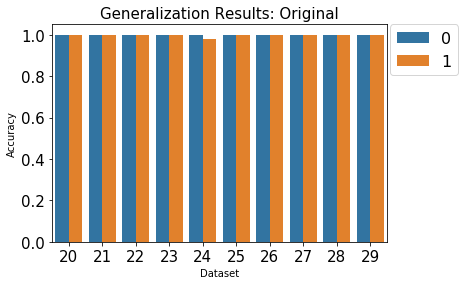

In [20]:
id_list = list(range(20, 30))
results_raw = [best_d, best_l]
handle(id_list, results_raw, "Original")

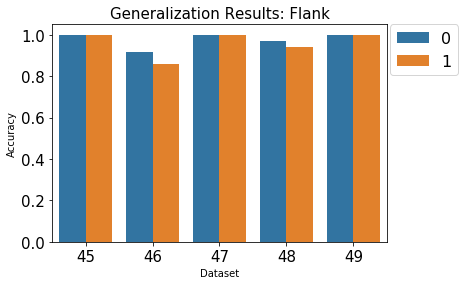

In [21]:
id_list = list(range(45, 50))
results_raw = [best_d, best_l]
handle(id_list, results_raw, "Flank")

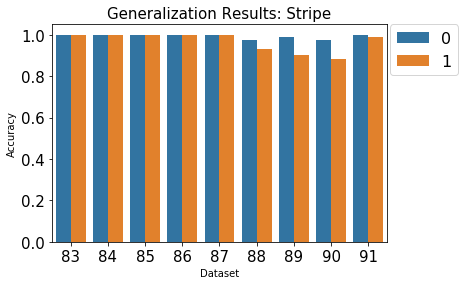

In [22]:
id_list = list(range(83, 92))
results_raw = [best_d, best_l]
handle(id_list, results_raw, "Stripe")

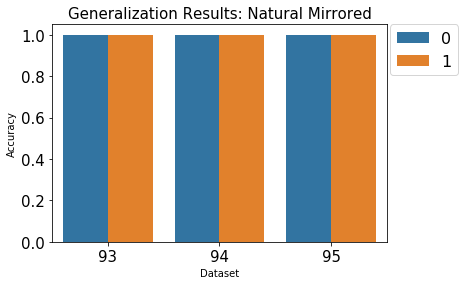

In [23]:
id_list = list(range(93, 96))
results_raw = [best_d, best_l]
handle(id_list, results_raw, "Natural Mirrored")

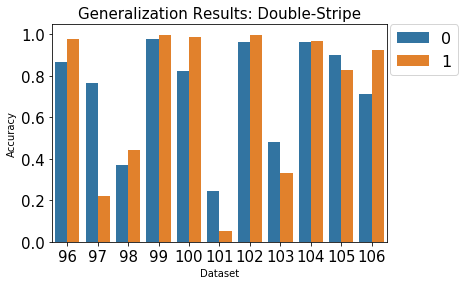

In [58]:
id_list = list(range(96, 107))
results_raw = [best_d, best_l]
handle(id_list, results_raw, "Double-Stripe")

In [74]:
id_list = list(range(20, 30))
results_raw = [best3, best4, best5]
handle(id_list, results_raw, "Original")

[{'opt': <experiments.LSTM3.Experiments at 0x2af2e42fe128>,
  'results': {20: 0.9998003194888179,
   21: 0.9997004792332268,
   22: 0.9995007987220448,
   23: 0.9989017571884984,
   24: 0.9996006389776357,
   25: 0.9998003194888179,
   26: 0.9999001597444089,
   27: 0.9998003194888179,
   28: 0.9999001597444089,
   29: 1.0,
   45: 1.0,
   46: 0.9956070287539937,
   47: 0.9999001597444089,
   48: 0.9956070287539937,
   49: 1.0,
   50: 0.9971046325878594,
   51: 0.029053514376996804,
   52: 0.10233626198083066,
   53: 0.16463658146964857,
   54: 0.3226837060702875,
   55: 0.03574281150159744,
   56: 0.10043929712460063,
   57: 0.15874600638977635,
   58: 0.33446485623003197,
   59: 0.03224840255591054,
   60: 0.10523162939297125,
   61: 0.1680311501597444,
   62: 0.33176916932907347,
   82: 0.00019968051118210862,
   83: 1.0,
   84: 1.0,
   85: 1.0,
   86: 1.0,
   87: 1.0,
   88: 0.8267771565495208,
   89: 0.0,
   90: 0.0,
   91: 9.984025559105431e-05,
   92: 9.984025559105431e-05,
   93

In [14]:
# LSTM3 RESULTS

cats = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]
test_cats = cats + ["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS"] + ["diff1NS", "diff3NS", "diff5NS", "diff10NS"]
name = '/results/generalization_accuracy.pkl'
best, all_lstm3, thresh_lstm3 = get_max_generalization_results(['lstm3'], 0.4, name)
for res in best:
    print("\nname:", res['opt'].name,
          "\nlearning rate: ", res['opt'].hyper.learning_rate, 
          "\ntraining dataset size: ", res['opt'].dataset.num_images_training, 
          "\ntraining categories: ", res['opt'].dataset.type,
         "\nunrolling steps: ", res['opt'].dnn.n_t)
    print("avg test accuracy across all 10 categories:", np.asarray(list(res['results'].values())).mean())
    print(res)
    idx = 20
    lstm3_gen_results = {cat: [] for cat in test_cats}    
    for j, img_type in enumerate(["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]):
        lstm3_gen_results[img_type].append(res['results'][idx])
        idx += 1
    
    idx = 45
    for j, img_type in enumerate(["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS"]):
        lstm3_gen_results[img_type].append(res['results'][idx])
        idx += 1
            
    idx = 51
    for j, img_type in enumerate(["diff1NS", "diff3NS", "diff5NS", "diff10NS"]):
        lstm3_gen_results[img_type].append(res['results'][idx])
        idx += 1

print("\n")
for cat in lstm3_gen_results:
    print("{}: {}".format(cat, mean(lstm3_gen_results[cat])))
        
# Sanity check - no dilation
# display more visualization in the test_generalization script

353
/om/user/shobhita/data/symmetry/lstm3/ID91_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID92_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID93_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID94_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID95_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID96_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID97_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID98_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID99_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID100_LSTM3_D107/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID101_LSTM3_D107/results/generalization_accuracy.pkl
/om/

/om/user/shobhita/data/symmetry/lstm3/ID295_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID296_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID297_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID298_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID299_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID300_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID301_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID302_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID303_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID304_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/shobhita/data/symmetry/lstm3/ID305_LSTM3_D32/results/generalization_accuracy.pkl
/om/user/s

In [9]:
# LSTM3 BEST RESULTS
train_cats = ["NS0", "NS4", "S0", "S4"]
for res in best:

    idx = 20
    lstm3_gen_results = {cat: [] for cat in test_cats}
    original_results_lstm = []
    flank_results_lstm = []
    diff_results_lstm = []
    for j, img_type in enumerate(["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]):
        lstm3_gen_results[img_type].append(res['results'][idx])
        if img_type not in train_cats:
            original_results_lstm.append(res['results'][idx])
        idx += 1

    idx = 45
    for j, img_type in enumerate(["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS"]):
        lstm3_gen_results[img_type].append(res['results'][idx])
        flank_results_lstm.append(res['results'][idx])
        idx += 1

    idx = 51
    for j, img_type in enumerate(["diff1NS", "diff3NS", "diff5NS", "diff10NS"]):
        lstm3_gen_results[img_type].append(res['results'][idx])
        diff_results_lstm.append(res['results'][idx])
        idx += 1
    
    display = True
    for cat in lstm3_gen_results:
        if mean(lstm3_gen_results[cat]) < 0.8 and cat in ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]:
            display = False
    if display:
        print("\nname:", res['opt'].name,
              "\nlearning rate: ", res['opt'].hyper.learning_rate, 
              "\ntraining dataset size: ", res['opt'].dataset.num_images_training, 
              "\ntraining categories: ", res['opt'].dataset.type)
        print("avg test accuracy across all 10 categories:", np.asarray(list(res['results'].values())).mean())
        for cat in lstm3_gen_results:
            print("{}: {}".format(cat, mean(lstm3_gen_results[cat])))
        


name: ID90_LSTM3_D32 
learning rate:  1e-05 
training dataset size:  100000.0 
training categories:  ['NS0', 'NS4', 'S0', 'S4']
avg test accuracy across all 10 categories: 0.5867861421725241
NS0: 0.9999001597444089
NS2: 1.0
NS4: 1.0
NS6: 0.9975039936102237
NSd4: 1.0
S0: 1.0
S2: 1.0
S4: 1.0
S6: 1.0
Sd4: 1.0
flank1S: 0.9980031948881789
flank1NS: 0.9750399361022364
flank2S: 0.9957068690095847
flank2NS: 0.9899161341853036
flank3S: 1.0
flank3NS: 0.9951078274760383
diff1NS: 0.00019968051118210862
diff3NS: 0.0075878594249201275
diff5NS: 0.02915335463258786
diff10NS: 0.12000798722044728


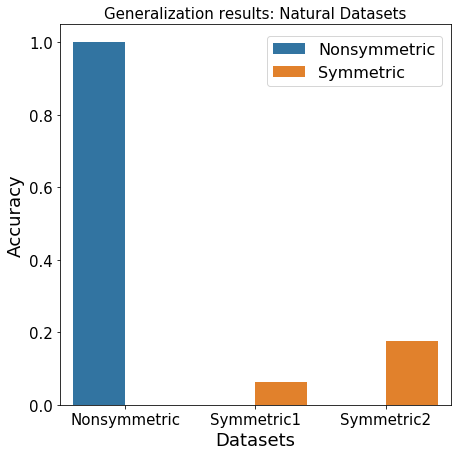

In [45]:
net="lstm3"
name = '/results/generalization_accuracy_natural_ims.pkl'
import experiments.LSTM3 as experiments


output_path = '/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results'
natural3 = pickle.load(open(output_path + "/generalization_accuracy_natural_ims3.pkl", "rb"))
natural2 = pickle.load(open(output_path + "/generalization_accuracy_natural_ims2.pkl", "rb"))
natural1 = pickle.load(open(output_path + "/generalization_accuracy_natural_ims1.pkl", "rb"))

accs = [natural2['acc'][94], natural2['acc'][93], natural3['acc'][95]]
natural_df = pd.DataFrame()
natural_df["Accuracy"] = accs
natural_df["Dataset"] = ["Nonsymmetric", "Symmetric1", "Symmetric2"]
natural_df["Class"] = ["Nonsymmetric", "Symmetric", "Symmetric"]

fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(x="Dataset", y="Accuracy", hue="Class", data=natural_df, ax=ax)
ax.set_title("Generalization results: Natural Datasets", fontsize=15)
ax.set_xlabel("Datasets", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(bbox_to_anchor=(0.53, 0.97), loc=2, borderaxespad=0., prop={"size": 16})



185
/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results/generalization_accuracy_stripe_10iter.pkl
185
/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results/generalization_accuracy_stripe_20iter.pkl
185
/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results/generalization_accuracy_stripe_30iter.pkl
185
/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results/generalization_accuracy_stripe_40iter.pkl
185
/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results/generalization_accuracy_stripe_50iter.pkl


Text(0, 0.5, 'Accuracy')

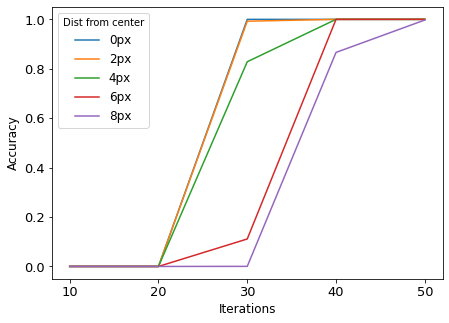

In [86]:
# LSTM3 Stripe results - 50 iter
import experiments.LSTM3 as experiments
from statistics import mean

cats = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]
test_cats = ["stripe2S", "stripe4S", "stripe6S", "stripe8S", "stripe10S", "stripe2NS", "stripe4NS", "stripe6NS", "stripe8NS", "stripe10NS"]
name = '/results/generalization_accuracy_stripe_50iter.pkl'
net = "lstm3"
experiment_id = 90

def get_stripe_results(filename, experiment_id, net):
    output_path = '/om/user/shobhita/data/symmetry/' + net + '/'
    run_opt = experiments.get_experiments(output_path)
    opt_data = datasets.get_datasets(output_path)
    opt = run_opt[experiment_id]

    data_point = {}
    data_point["opt"] = opt
    stripe_datasets = {ds.ID: ds.type[0] for ds in opt_data if ds.type[0] in STRIPE_DATASETS}

    if not os.path.isfile(opt.log_dir_base + opt.name + filename):
        data_point["results"] = "empty"
        print(opt.log_dir_base + opt.name + filename)
    else:
        with open(opt.log_dir_base + opt.name + filename, 'rb') as f:
            data_point["results"] = pickle.load(f)
            print(opt.log_dir_base + opt.name + filename)



    results = {name: [] for name in STRIPE_DATASETS}
    for idx, acc in data_point['results'].items():
        results[stripe_datasets[idx]].append(acc)
    return results

full_results = pd.DataFrame()
for iters in [10,20,30,40,50]:
    name = "/results/generalization_accuracy_stripe_{}iter.pkl".format(iters)
    results = get_stripe_results(name, experiment_id, net)
    iter_results = {name: mean(accs) for name, accs in results.items() if "N" not in name}
    full_results = full_results.append(pd.Series(iter_results), ignore_index=True)
full_results.index = [10,20,30,40,50]
full_results.columns = ["0px", "8px", "6px", "4px", "2px"]
full_results = full_results[["0px", "2px", "4px", "6px", "8px"]]

fig, ax = plt.subplots(figsize=(7,5))
ax = sns.lineplot(data=full_results, dashes=False, ax=ax)
ax.set_xticks([10,20,30,40,50])
ax.legend(title="Dist from center", prop={"size":12})
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
ax.set_xlabel("Iterations", size=12)
ax.set_ylabel("Accuracy", size=12)

In [32]:
# LSTM3 Natural Results
import experiments.LSTM3 as experiments
filename = "/results/generalization_accuracy_natural_ims_mirror.pkl"
experiment_id = 90
net = "lstm3"
output_path = '/om/user/shobhita/data/symmetry/' + net + '/'

run_opt = experiments.get_experiments(output_path)
opt_data = datasets.get_datasets(output_path)
opt = run_opt[experiment_id]

data_point = {}
data_point["opt"] = opt

if not os.path.isfile(opt.log_dir_base + opt.name + filename):
    data_point["results"] = "empty"
    print("ERROR: ", opt.log_dir_base + opt.name + filename)
else:
    with open(opt.log_dir_base + opt.name + filename, 'rb') as f:
        data_point["results"] = pickle.load(f)
        print(opt.log_dir_base + opt.name + filename)

data_point["results"]["acc"]

185
/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results/generalization_accuracy_natural_ims_mirror.pkl


{93: 1.0, 94: 1.0, 95: 1.0}

In [33]:
# LSTM3 Natural Results
import experiments.LSTM3 as experiments
filename = "/results/generalization_accuracy_tests_96_105.pkl"
experiment_id = 90
net = "lstm3"
output_path = '/om/user/shobhita/data/symmetry/' + net + '/'

run_opt = experiments.get_experiments(output_path)
opt_data = datasets.get_datasets(output_path)
opt = run_opt[experiment_id]

data_point = {}
data_point["opt"] = opt

if not os.path.isfile(opt.log_dir_base + opt.name + filename):
    data_point["results"] = "empty"
    print("ERROR: ", opt.log_dir_base + opt.name + filename)
else:
    with open(opt.log_dir_base + opt.name + filename, 'rb') as f:
        data_point["results"] = pickle.load(f)
        print(opt.log_dir_base + opt.name + filename)


accs = data_point["results"]["acc"]
for idx in accs:
    print("DATASET {}: {}".format(idx, accs[idx]))

185
/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results/generalization_accuracy_tests_96_105.pkl
DATASET 96: 0.9996006389776357
DATASET 97: 0.0016972843450479233
DATASET 98: 0.0008985623003194888
DATASET 99: 1.0
DATASET 100: 0.9920127795527156
DATASET 101: 0.0005990415335463259
DATASET 102: 1.0
DATASET 103: 9.984025559105431e-05
DATASET 104: 1.0
DATASET 105: 0.16533546325878595


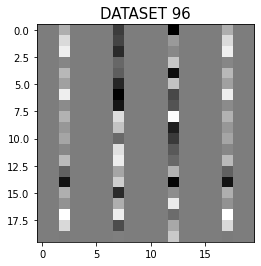

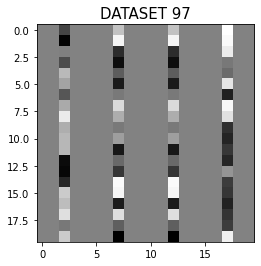

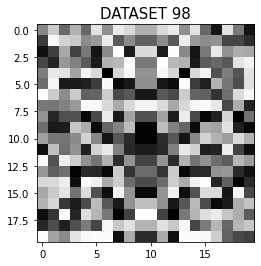

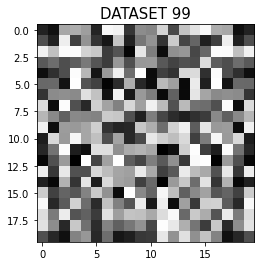

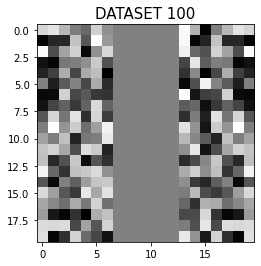

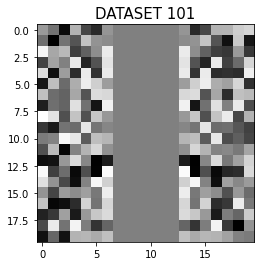

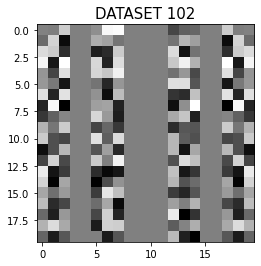

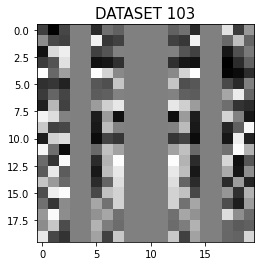

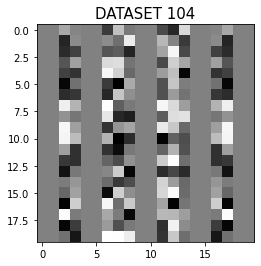

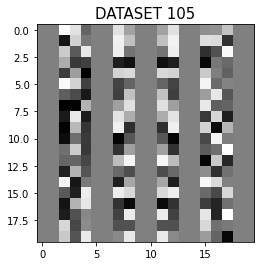

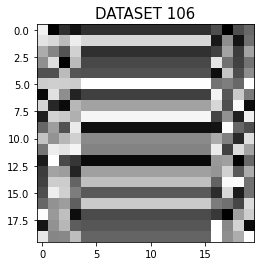

In [18]:


fns = {"test96": test96,
    "test97": test97,
    "test98": test98,
    "test99": test99,
    "test100": test100,
    "test101": test101,
    "test102": test102,
    "test103": test103,
    "test104": test104,
    "test105": test105,
    "test106": test106}
for fn in fns:
    im, label = fns[fn](imsize)
    fig, ax = plt.subplots()
    ax.imshow(im, cmap="gray")
    ax.set_title("DATASET {}".format(fn.split("test")[1]), fontsize=15)

185
/om/user/shobhita/data/symmetry/lstm3/ID90_LSTM3_D32/results/generalization_accuracy_stripe.pkl
/om/user/shobhita/data/symmetry/dilation/ID54_Dilation_D32/results/generalization_accuracy_stripe.pkl
       Dataset  Accuracy  Network
0     stripe2S  0.997338     LSTM
1     stripe4S  1.000000     LSTM
2     stripe6S  1.000000     LSTM
3     stripe8S  1.000000     LSTM
4    stripe10S  1.000000     LSTM
5    stripe2NS  0.979999     LSTM
6    stripe4NS  0.995008     LSTM
7    stripe6NS  0.997571     LSTM
8    stripe8NS  0.999534     LSTM
9   stripe10NS  0.999834     LSTM
10    stripe2S  0.940063  Dilated
11    stripe4S  0.999900  Dilated
12    stripe6S  0.999401  Dilated
13    stripe8S  0.999967  Dilated
14   stripe10S  1.000000  Dilated
15   stripe2NS  0.798389  Dilated
16   stripe4NS  0.896133  Dilated
17   stripe6NS  0.979866  Dilated
18   stripe8NS  0.979965  Dilated
19  stripe10NS  0.998336  Dilated


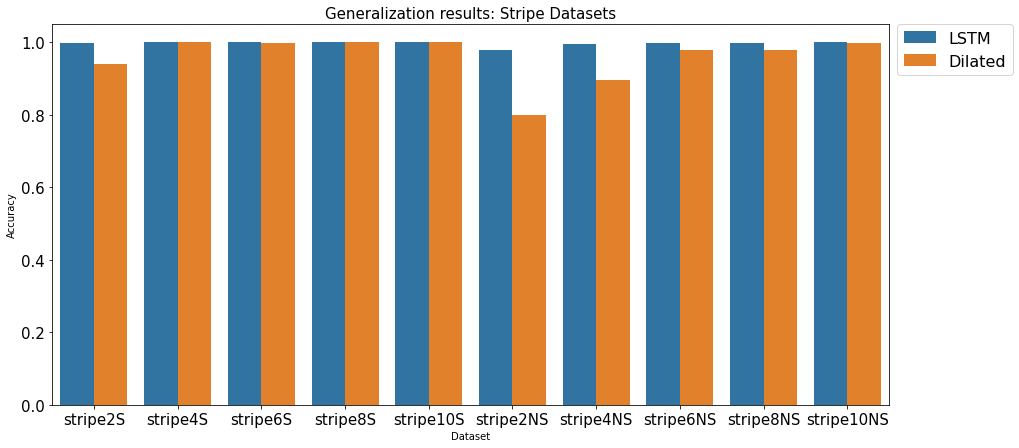

In [79]:
filename = "/results/generalization_accuracy_stripe.pkl"
import experiments.LSTM3 as experiments
experiment_id=90
net="lstm3"
full_results = pd.DataFrame()
dataset_labels = ["stripe{}S".format(i) for i in [8, 6, 4, 2, 0]] + ["stripe{}NS".format(i) for i in [8, 6, 4, 2, 0]]

stripe_lstm = get_stripe_results(filename, experiment_id, net)
iter_results_lstm = {name: mean(accs) for name, accs in stripe_lstm.items()}
full_results_lstm = pd.DataFrame()
full_results_lstm["Dataset"] = list(iter_results_lstm.keys())
full_results_lstm["Accuracy"] = list(iter_results_lstm.values())
full_results_lstm["Network"] = "LSTM"

import experiments.dilation as experiments
experiment_id=54
net="dilation"
stripe_dilated = get_stripe_results(filename, experiment_id, net)
iter_results_dilated = {name: mean(accs) for name, accs in stripe_dilated.items()}
full_results_dilated = pd.DataFrame()
full_results_dilated["Dataset"] = list(iter_results_dilated.keys())
full_results_dilated["Accuracy"] = list(iter_results_dilated.values())
full_results_dilated["Network"] = "Dilated"

full_results = pd.concat([full_results_lstm, full_results_dilated], ignore_index=True)
print(full_results)

fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=full_results, ax=ax)
ax.set_title("Generalization results: Stripe Datasets", fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={"size": 16})

plt.show()

In [23]:
def get_stripe_results(filename, experiment_id, net):
    output_path = '/om/user/shobhita/data/symmetry/' + net + '/'
    run_opt = experiments.get_experiments(output_path)
    opt_data = datasets.get_datasets(output_path)
    opt = run_opt[experiment_id]

    data_point = {}
    data_point["opt"] = opt
    stripe_datasets = {ds.ID: ds.type[0] for ds in opt_data if ds.type[0] in STRIPE_DATASETS}

    if not os.path.isfile(opt.log_dir_base + opt.name + filename):
        data_point["results"] = "empty"
        print(opt.log_dir_base + opt.name + filename)
    else:
        with open(opt.log_dir_base + opt.name + filename, 'rb') as f:
            data_point["results"] = pickle.load(f)
            print(opt.log_dir_base + opt.name + filename)



    results = {name: [] for name in STRIPE_DATASETS}
    for idx, acc in data_point['results'].items():
        results[stripe_datasets[idx]].append(acc)
    return results

import experiments.dilation as experiments
experiment_id=54
net="dilation"
stripe_dilated = get_stripe_results(filename, experiment_id, net)
stripe_dilated

/om/user/shobhita/data/symmetry/dilation/ID54_Dilation_D32/results/generalization_accuracy_stripe.pkl


{'stripe2S': [0.9405950479233227, 0.939297124600639, 0.9402955271565495],
 'stripe4S': [0.9999001597444089, 1.0, 0.9998003194888179],
 'stripe6S': [0.9995007987220448, 0.9997004792332268, 0.9990015974440895],
 'stripe8S': [0.9999001597444089, 1.0, 1.0],
 'stripe10S': [1.0, 1.0, 1.0],
 'stripe2NS': [0.8006190095846646, 0.795826677316294, 0.7987220447284346],
 'stripe4NS': [0.8987619808306709, 0.8972643769968051, 0.8923722044728435],
 'stripe6NS': [0.9793330670926518, 0.9797324281150159, 0.9805311501597445],
 'stripe8NS': [0.981729233226837, 0.9792332268370607, 0.9789337060702875],
 'stripe10NS': [0.9984025559105432, 0.99810303514377, 0.9985023961661342]}

In [35]:
fig = sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=original_df)
fig.set_title("Generalization results: Original Datasets")
fig.set(xlabel="Dataset", ylabel="Accuracy")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

NameError: name 'original_df' is not defined

In [36]:
# VIEWING DILATION RESULTS

cats = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]
test_cats = ["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS", "diff1NS"]
dataset_id_offset = 33
name = '/results/generalization_accuracy_new1.pkl'
best_dilation, all_dilation, thresh_dilation = get_max_generalization_results(['dilation'], 0, name)
for res in best_dilation:
    print("\nname:", res['opt'].name,
          "\nlearning rate: ", res['opt'].hyper.learning_rate, 
          "\ntraining dataset size: ", res['opt'].dataset.num_images_training, 
          "\ntraining categories: ", res['opt'].dataset.type)
    print("avg test accuracy across all 10 categories:", np.asarray(list(res['results'].values())).mean())
    print(res)
    idx = 33
    dilation_gen_results = {cat: [] for cat in test_cats}        
    for k, size in enumerate([1e3, 1e4, 1e5]):
        for j, img_type in enumerate(["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS"]):
            dilation_gen_results[img_type].append(res['results'][idx])
            idx += 1
    for k, size in enumerate([1e3, 1e4, 1e5]):
        for j, img_type in enumerate(["diff1NS"]):
            dilation_gen_results[img_type].append(res['results'][idx])
            idx += 1

print("\n")
for cat in dilation_gen_results:
    print("{}: {}".format(cat, mean(dilation_gen_results[cat])))
        
# Sanity check - no dilation
# display more visualization in the test_generalization script

54
{'opt': <experiments.dilation.Experiments object at 0x2b02e3b104a8>, 'results': {33: 0.0, 34: 1.0, 35: 0.0, 36: 1.0, 37: 0.0, 38: 1.0, 39: 0.0, 40: 1.0, 41: 0.0, 42: 1.0, 43: 0.0, 44: 1.0, 45: 0.0, 46: 1.0, 47: 0.0, 48: 1.0, 49: 0.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0}}
{'opt': <experiments.dilation.Experiments object at 0x2b02e3b14e80>, 'results': {33: 1.0, 34: 0.0, 35: 1.0, 36: 0.0, 37: 1.0, 38: 0.0, 39: 1.0, 40: 0.0, 41: 1.0, 42: 0.0, 43: 1.0, 44: 0.0, 45: 1.0, 46: 0.0, 47: 1.0, 48: 0.0, 49: 1.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0}}
{'opt': <experiments.dilation.Experiments object at 0x2b02e3859da0>, 'results': {33: 0.0, 34: 1.0, 35: 0.0, 36: 1.0, 37: 0.0, 38: 1.0, 39: 0.0, 40: 1.0, 41: 0.0, 42: 1.0, 43: 0.0, 44: 1.0, 45: 0.0, 46: 1.0, 47: 0.0, 48: 1.0, 49: 0.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0}}
{'opt': <experiments.dilation.Experiments object at 0x2b02e3859a90>, 'results': {33: 0.0, 34: 1.0, 35: 0.0, 36: 1.0, 37: 0.0, 38: 1.0, 39: 0.0, 40: 1.0, 41: 0.0, 42: 1.0, 43: 0.0, 44: 

In [10]:
# VIEWING DILATION RESULTS

cats = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]
test_cats = ["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS", "diff1NS", "diff3NS", "diff5NS", "diff10NS"]
dataset_id_offset = 33
name = '/results/generalization_accuracy2.pkl'
best_dilation, all_dilation, thresh_dilation = get_max_generalization_results(['dilation'], 0, name)
for res in best_dilation:
    flank_results_dilation = {}
    diff_results_dilation = {}
    print("\nname:", res['opt'].name,
          "\nlearning rate: ", res['opt'].hyper.learning_rate, 
          "\ntraining dataset size: ", res['opt'].dataset.num_images_training, 
          "\ntraining categories: ", res['opt'].dataset.type)
    print("avg test accuracy across all 10 categories:", np.asarray(list(res['results'].values())).mean())
    print(res)
    idx = 33
    dilation_gen_results = {cat: [] for cat in test_cats}        
    for k, size in enumerate([1e3, 1e4, 1e5]):
        for j, img_type in enumerate(["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS"]):
            dilation_gen_results[img_type].append(res['results'][idx])
            if img_type not in flank_results_dilation:
                flank_results_dilation[img_type] = res['results'][idx]
            idx += 1
    for k, size in enumerate([1e3, 1e4, 1e5]):
        for j, img_type in enumerate(["diff1NS","diff3NS", "diff5NS", "diff10NS"]):
            dilation_gen_results[img_type].append(res['results'][idx])
            if img_type not in diff_results_dilation:
                diff_results_dilation[img_type] = res['results'][idx]
            idx += 1

print("\n")
print(dilation_gen_results)
for cat in dilation_gen_results:
    print("{}: {}".format(cat, mean(dilation_gen_results[cat])))
        
# Sanity check - no dilation
# display more visualization in the test_generalization script

/om/user/shobhita/data/symmetry/dilation/ID55_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID56_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID57_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID58_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID59_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID60_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID61_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID62_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID63_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation/ID64_Dilation_D30/results/generalization_accuracy2.pkl
/om/user/shobhita/data/symmetry/dilation

AttributeError: 'str' object has no attribute 'values'

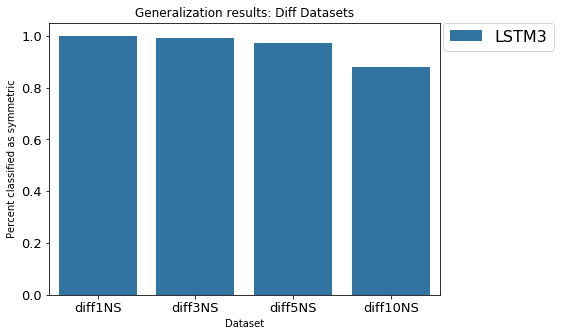

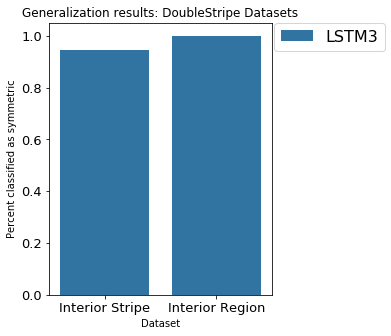

In [53]:
# COMBINED RESULTS
original_cats = ["NS2", "NS6", "NSd4", "S2", "S6", "Sd4"]
flank_cats = ["flank1S", "flank1NS", "flank2S", "flank2NS", "flank3S", "flank3NS"]
diff_cats = ["diff1NS", "diff3NS", "diff5NS", "diff10NS"]
original_results_dilated = [1 for _ in original_cats]

# flank_results_dilated = list(flank_results_dilation.values())
# diff_results_dilated = list(diff_results_dilation.values())

# def get_combined_result_df(results_dilated, results_lstm, cats):
#     df = pd.DataFrame()
#     df["Accuracy"] = results_dilated + results_lstm
#     df["Dataset"] = cats*2
#     df["Network"] = ["Dilated"]*len(results_dilated) + ["LSTM3"]*len(results_lstm)
#     return df

# original_df = get_combined_result_df(original_results_dilated, original_results_lstm, original_cats)
# flank_df = get_combined_result_df(flank_results_dilated, flank_results_lstm, flank_cats)
# diff_df = get_combined_result_df(diff_results_dilated, diff_results_lstm, diff_cats)

# fig, ax = plt.subplots(figsize=(7,5))
# fig = sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=original_df, ax=ax)
# fig.set_title("Generalization results: Original Datasets")
# fig.set(xlabel="Dataset", ylabel="Accuracy")
# fig.tick_params(axis="x", labelsize=13)
# fig.tick_params(axis="y", labelsize=13)
# plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 16})
# plt.show()

# flank_df = flank_df.reindex([0,2,4,6,8,10,1,3,5,7,9,11])

# fig, ax = plt.subplots(figsize=(9,5))
# fig = sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=flank_df, ax=ax)
# fig.set_title("Generalization results: Flank Datasets")
# fig.set(xlabel="Dataset", ylabel="Accuracy")
# fig.tick_params(axis="x", labelsize=13)
# fig.tick_params(axis="y", labelsize=13)
# plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 16})
# plt.show()


fig, ax = plt.subplots(figsize=(7,5))
fig = sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=diff_df, ax=ax)
fig.set_title("Generalization results: Diff Datasets")
fig.set(xlabel="Dataset", ylabel="Percent classified as symmetric", ylim=(0,1.05))
fig.tick_params(axis="x", labelsize=13)
fig.tick_params(axis="y", labelsize=13)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 16})

plt.show()

fig, ax = plt.subplots(figsize=(4,5))
fig = sns.barplot(x="Dataset", y="Accuracy", hue="Network", data=ds_df, ax=ax)
fig.set_title("Generalization results: DoubleStripe Datasets")
fig.set(xlabel="Dataset", ylabel="Percent classified as symmetric", ylim=(0,1.05))
fig.tick_params(axis="x", labelsize=13)
fig.tick_params(axis="y", labelsize=13)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., prop={'size': 16})

plt.show()
    

In [49]:
"""
DATASET 96: 0.9996006389776357
DATASET 97: 0.0016972843450479233
DATASET 98: 0.0008985623003194888
DATASET 99: 1.0
DATASET 100: 0.9920127795527156
DATASET 101: 0.0005990415335463259
DATASET 102: 1.0
DATASET 103: 9.984025559105431e-05
DATASET 104: 1.0
DATASET 105: 0.16533546325878595

# Interior stripe = 97, 103, 105
# Interior region = 98, 101
"""



diff_df = pd.DataFrame()
diff_df["Accuracy"] = diff_results_lstm
diff_df["Dataset"] = diff_cats
diff_df["Network"] = ["LSTM3"]*len(diff_results_lstm)
diff_df["Accuracy"] = 1-diff_df["Accuracy"]

ds_df = pd.DataFrame()
ds_df["Accuracy"] = [1-mean([0.0016972843450479233, 9.984025559105431e-05, 0.16533546325878595]),
                    1-mean([0.0008985623003194888, 0.0005990415335463259])]
ds_df["Dataset"] = ["Interior Stripe", "Interior Region"]
ds_df["Network"] = ["LSTM3"]*2


In [29]:
# VIEWING 2-LSTM RESULTS

best_lstm, all_lstm = get_max_generalization_results(['multi_lstm_init'], 0.6)
for res in best_lstm:
    n = res['opt'].name
    print("\nname: ", res['opt'].name,
          "\nlearning rate: ", res['opt'].hyper.learning_rate, 
          "\ntraining dataset size: ", res['opt'].dataset.num_images_training, 
          "\ntraining categories: ", res['opt'].dataset.type,
          "\niterations: ", res['opt'].dnn.n_t)
    print("avg test accuracy across all 10 categories:", np.asarray(list(res['results'].values())).mean())
    all_accs = {cats[i]: res['results'][i] for i in range(10)}
    print("all accuracies: ")
    for i in all_accs:
        print("{}: {}".format(i, all_accs[i]))

lstm_gen_results = {cat: 0 for cat in test_cats}
res = best_lstm[1]['results']
print(res)
for i in range(10):
    cat = cats[i]
    if cat in test_cats:
        lstm_gen_results[cat] = res[i]
        
print(lstm_gen_results)

163

name:  ID124_MultiLSTMInit_D32 
learning rate:  1e-05 
training dataset size:  100000.0 
training categories:  ['NS0', 'NS4', 'S0', 'S4'] 
iterations:  5
avg test accuracy across all 10 categories: 0.6022830138445155
all accuracies: 
NS0: 1.0
NS2: 0.9976038338658147
NS4: 0.8660143769968051
NS6: 0.0
NSd4: 0.7272364217252396
S0: 1.0
S2: 0.0064896166134185305
S4: 0.1446685303514377
S6: 1.0
Sd4: 0.28574281150159747

name:  ID142_MultiLSTMInit_D32 
learning rate:  1e-05 
training dataset size:  100000.0 
training categories:  ['NS0', 'NS4', 'S0', 'S4'] 
iterations:  5
avg test accuracy across all 10 categories: 0.6197883386581469
all accuracies: 
NS0: 1.0
NS2: 0.6982827476038339
NS4: 0.4699480830670926
NS6: 0.0
NSd4: 0.0
S0: 1.0
S2: 0.3627196485623003
S4: 0.6753194888178914
S6: 1.0
Sd4: 1.0
{0: 1.0, 1: 0.6982827476038339, 2: 0.4699480830670926, 3: 0.0, 4: 0.0, 5: 1.0, 6: 0.3627196485623003, 7: 0.6753194888178914, 8: 1.0, 9: 1.0, 10: 1.0, 11: 0.7029752396166135, 12: 0.4626597444089457, 

In [25]:
# VIEWING FF RESULTS

cats = ["NS0", "NS2", "NS4", "NS6", "NSd4", "S0", "S2", "S4", "S6", "Sd4"]

best_ff, all_ff = get_max_generalization_results(['FF'], 0.75)
for res in best_ff:
    print("\nname:", res['opt'].name,
          "\nlearning rate: ", res['opt'].hyper.learning_rate, 
          "\ntraining dataset size: ", res['opt'].dataset.num_images_training, 
          "\ntraining categories: ", res['opt'].dataset.type,
          "\nno dilations?: ", res['opt'].dnn.no_dilation)
    print("avg test accuracy across all 10 categories:", np.asarray(list(res['results'].values())).mean())
    all_accs = {cats[i]: res['results'][i] for i in range(10)}
    print("all accuracies: ")
    for i in all_accs:
        print("{}: {}".format(i, all_accs[i]))

ff_gen_results = {cat: 0 for cat in test_cats}
res = best_ff[0]['results']
print(res)
for i in range(10):
    cat = cats[i]
    if cat in test_cats:
        ff_gen_results[cat] = res[i]
        
print(ff_gen_results)
        


name: ID12_Dilation_D31 
learning rate:  1e-05 
training dataset size:  10000.0 
training categories:  ['NS0', 'NS4', 'S0', 'S4'] 
no dilations?:  True
avg test accuracy across all 10 categories: 0.8411108892438767
all accuracies: 
NS0: 0.9959065495207667
NS2: 0.9774361022364217
NS4: 0.9972044728434505
NS6: 0.4115415335463259
NSd4: 1.0
S0: 0.9993011182108626
S2: 1.0
S4: 0.9999001597444089
S6: 0.9904153354632588
Sd4: 0.04952076677316294

name: ID18_Dilation_D32 
learning rate:  1e-05 
training dataset size:  100000.0 
training categories:  ['NS0', 'NS4', 'S0', 'S4'] 
no dilations?:  True
avg test accuracy across all 10 categories: 0.9078807241746539
all accuracies: 
NS0: 0.9994009584664537
NS2: 1.0
NS4: 1.0
NS6: 0.14386980830670926
NSd4: 0.9395966453674122
S0: 1.0
S2: 1.0
S4: 1.0
S6: 1.0
Sd4: 1.0
{0: 0.9959065495207667, 1: 0.9774361022364217, 2: 0.9972044728434505, 3: 0.4115415335463259, 4: 1.0, 5: 0.9993011182108626, 6: 1.0, 7: 0.9999001597444089, 8: 0.9904153354632588, 9: 0.049520766

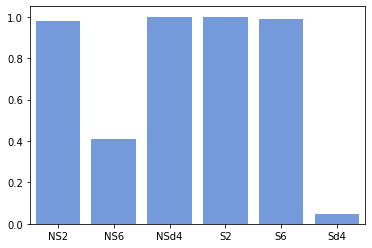

In [26]:
gen_results = dilation_gen_results

# sns.barplot(test_cats, list(dilation_gen_results.values()))
sns.barplot(test_cats, list(ff_gen_results.values()), color="cornflowerblue")

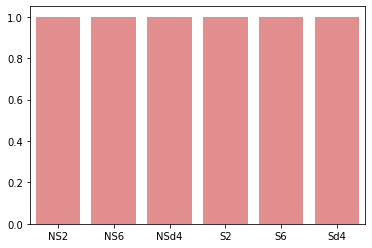

In [28]:
sns.barplot(test_cats, list(dilation_gen_results.values()), color="lightcoral")

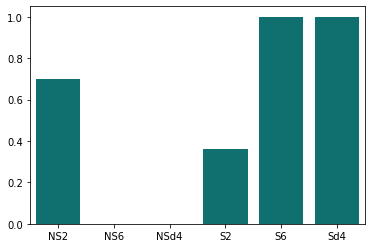

In [30]:
sns.barplot(test_cats, list(lstm_gen_results.values()), color="teal")

[[1.0], [0.9975039936102237], [1.0], [1.0], [1.0], [1.0]]


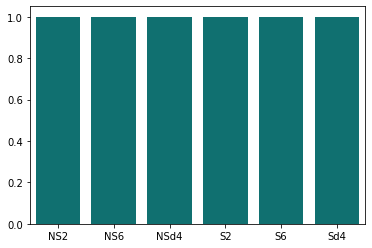

In [44]:
og_cats = ["NS2", "NS6", "NSd4", "S2", "S6", "Sd4"]
print([lstm3_gen_results[cat] for cat in og_cats])
lstm3_gen_results_final = {cat: mean(lstm3_gen_results[cat]) for cat in og_cats}
sns.barplot(og_cats, list(lstm3_gen_results_final.values()), color="teal")

In [43]:
with open(output_path + x + "/results/intra_dataset_accuracy.pkl", 'rb') as f:
    results = pickle.load(f)
    print(results)
    
with open(output_path + n + "/results/intra_dataset_accuracy.pkl", 'rb') as f:
    results = pickle.load(f)
    print(results)

{'train': 0.833508757157292, 'val': 0.8459813910407544, 'test': 0.8334456045806669}
{'train': 0.5017366958571909, 'val': 0.4899903166049175, 'test': 0.5008209834961267}


In [45]:
for res in all_lstm[-1]:
    if res['opt'].name == x:
        print(res)

{'opt': <experiments.multi_lstm_init.Experiments object at 0x2abc17fa1438>, 'results': {0: 1.0, 1: 0.6982827476038339, 2: 0.4699480830670926, 3: 0.0, 4: 0.0, 5: 1.0, 6: 0.3627196485623003, 7: 0.6753194888178914, 8: 1.0, 9: 1.0, 10: 1.0, 11: 0.7029752396166135, 12: 0.4626597444089457, 13: 0.0, 14: 0.0, 15: 1.0, 16: 0.3600239616613419, 17: 0.6715255591054313, 18: 1.0, 19: 1.0, 20: 1.0, 21: 0.7007787539936102, 22: 0.46575479233226835, 23: 0.0, 24: 0.0, 25: 1.0, 26: 0.35692891373801916, 27: 0.6667332268370607, 28: 1.0, 29: 1.0}}


In [22]:
gen_results = dilation_gen_results
for cat in gen_results:
    gen_results[cat] = mean(gen_results[cat])
symmetric = ['flank1S', 'flank2S', 'flank3S']
nonsymmetric = ['flank1NS', 'flank2NS', 'flank3NS']



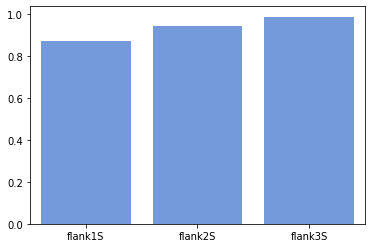

In [26]:
symm_data = [gen_results[cat] for cat in symmetric]
non_symm_data = [gen_results[cat] for cat in nonsymmetric]
sns.barplot(symmetric, symm_data, color="cornflowerblue")

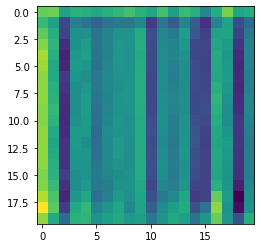

In [36]:
f = '/om/user/shobhita/data/symmetry/lstm3/activation_clusters_kmeans_3.pkl'
file = pickle.load(open(f, "rb"))
plt.imshow(file[0].reshape(20,20))

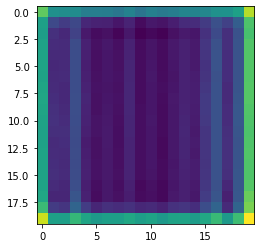

In [37]:
plt.imshow(file[1].reshape(20,20))

In [33]:
import pickle
impath = "/om/user/shobhita/data/symmetry/natural_images/gray_cropped_imaged_unmirrored.pkl"
ims = pickle.load(open(impath, "rb"))

In [8]:
ims = pickle.load(open("/om/user/shobhita/data/symmetry/natural_images/mirrored_symm_testing.pkl", "rb"))

In [15]:
len(ims)

1200